# Stage 0 Final Project

1. Who are you in the dataset?
2. What problem do you want to solve from the dataset?
3. What is the goal to be achieved?
4. What are the objectives that match the goals?
5. What business metrics are suitable to measure the achievement of the objectives?

1. Role: As a team of data scientists in a company called PT. Dats Your Future who have a role as used car dealer who is responsible for providing recommendations for used car prices based on historical purchase data from the previous 2 years in America which is assumed to be ideal because cars were successfully bought and resold to consumers at ideal prices.
2. Problem:
* The company determines the purchase price of a used car is not standard (not in accordance with the actual condition of the car) so that the price of a used car is determined from a biased perspective by each staff.
* The screening and negotiation process is quite long, eventually the customer becomes doubtful and tends not to sell their car to our company.
3. Goal: To help our company determine the purchase price of a used car that can be standardized based on machine learning models.
4. Objective: Create machine learning model to help predict car prices based on actual conditions.
5. Business Metrics: Sales & Purchasing,Time Efficiency

# Stage 1 Final Project - EDA, Insight, Visualization 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Change matplotlib default parameter
The matplotlib default parameters can be changed with rcParams as below:


In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load dataset

We will take a look at the car price dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/car_prices.csv',error_bad_lines=False,warn_bad_lines=True) #/content/drive/MyDrive/
df.head()

b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499085: expected 16 fields, saw 17\nSkipping line 501457: expected 16 fields, saw 17\nSkipping line 505301: expected 16 fields, saw 17\nSkipping line 505308: expected 16 fields, saw 17\nSkipping line 520463: expected 16 fields, saw 17\n'
b'Skipping line 528998: expected 1

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Descriptive Statistics
### Checking for missing columns and values with `df.info()`

The first thing that is usually done in EDA is to check the data type of each column and the number of missing values. We can do this by using `df.info()`.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


We can see that:
* The dataframe has a total of 558811 rows and 16 columns
* The output target seems to be the `sellingprice` column with data type `int64`
* The rest are *features*

From the information above, we can separate the categorical and numerical columns as follows:

In [ ]:
cats = ['make', 'model', 'trim', 'body', 'transmission','vin','state','color','interior','seller','saledate']
nums = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

Of course, defining column names based on *numeric* and *categorical* types as above is not mandatory, but this will certainly make some processes easier in the future.

### Sampling to understand data with `df.sample()`

After knowing what columns are in the dataset, we do sampling to make sure the contents of the columns match our expectations. Get in the habit of doing this a few times because often if something goes wrong it won't show up on the first sampling.

Sampling can be done using `df.sample()`

In [ ]:
df.sample(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
494677,2012,Infiniti,G Convertible,G37,g convertible,automatic,jn1cv6fe2cm202553,ca,4.4,24678.0,white,gray,nissan infiniti lt,27900,30750,Thu Jun 04 2015 05:30:00 GMT-0700 (PDT)
488361,2014,Nissan,Versa,1.6 SV,sedan,NaN,3n1cn7ap9el832873,ca,4.2,13415.0,—,gray,nissan motor acceptance corporation,10450,10250,Tue Jun 02 2015 05:30:00 GMT-0700 (PDT)
357889,2013,Infiniti,G Sedan,G37x,G Sedan,automatic,jn1cv6ar8dm759740,il,3.7,5473.0,black,black,nissan infiniti lt,23300,22400,Thu Feb 26 2015 02:00:00 GMT-0800 (PST)
38770,2012,Nissan,Maxima,3.5 SV,Sedan,automatic,1n4aa5ap3cc809009,tn,4.7,30504.0,black,tan,nissan-infiniti lt,17200,17600,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)
468182,2013,GMC,Terrain,SLE-1,suv,automatic,2gkalmek8d6147200,il,3.4,39795.0,white,black,santander consumer,16700,16200,Tue Jun 02 2015 03:00:00 GMT-0700 (PDT)
230582,2006,Acura,MDX,Base,SUV,automatic,2hnyd182x6h503665,md,3.9,208990.0,silver,black,auto place inc,3200,3300,Tue Feb 03 2015 01:30:00 GMT-0800 (PST)
301893,2012,Jeep,Compass,Latitude,SUV,automatic,1c4njdeb1cd583633,il,3.4,95931.0,gray,gray,emkay inc,11750,10300,Tue Feb 17 2015 02:00:00 GMT-0800 (PST)
415912,2014,Mazda,CX-5,Touring,SUV,automatic,jm3ke2cy6e0396392,tx,4.5,36332.0,gray,black,avis corporation,16700,16600,Wed Jun 10 2015 03:00:00 GMT-0700 (PDT)
177715,2007,Lexus,ES 350,Base,Sedan,automatic,jthbj46g672104605,mo,2.2,106934.0,gray,gray,hendrick lexus kansas city,10050,9400,Wed Feb 04 2015 02:30:00 GMT-0800 (PST)
432321,2012,Hyundai,Genesis,3.8,Sedan,automatic,kmhgc4dd9cu198192,fl,4.2,30082.0,white,beige,hyundai motor finance,19450,19800,Thu May 21 2015 03:45:00 GMT-0700 (PDT)


Some observations:
* Our target, `sellingprice` is of type int64

### Summary statistics with `df.describe()`
Next, we will present summary statistics of the dataframes, both for numerical and categorical. This is done to briefly examine the presence of outliers and distribution characteristics for numerical `features'.

In [ ]:
df[nums].describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [ ]:
df[cats].describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334


Some observations from the *statistical summary* categorical column above:
* `Trim`,`vin`,`seller` columns have a large number of unique values; may not be very useful for modeling
* The majority of this dataset is selling cars from the manufacturer (`make`) Ford, with the model (`body`) sedan.

### Value Counting
We can confirm observations regarding the above *categorical* columns by value counting

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom make:
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
ford tk           1
airstream         1
Lotus             1
dodge tk          1
chev truck        1
Name: make, Length: 96, dtype: int64

Value count kolom model:
Altima      19349
F-150       14479
Fusion      12946
Camry       12545
Escape      11861
            ...  
360             1
cherokee        1
B-Series        1
golf            1
lumina          1
Name: model, Length: 973, dtype: int64

Value count kolom trim:
Base               55817
SE                 43648
LX                 20757
Limited            18356
LT                 16915
                   ...  
se w/nav               1
Lux SULEV              1
econoline cargo        1
2.5l                   1
marquis                1
Name: trim, Length: 1975, dtype: int64

Value count kolom body:
Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatc

**Duplicates and Unique**

Next we will briefly check for duplicate values and unique values in the dataset.

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 16)


In [ ]:
df.make.unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

In [ ]:
len(df.make.unique())

97

In [ ]:
# lowercase data make 
df.make = df.make.str.lower()
len(df.make.unique())

67

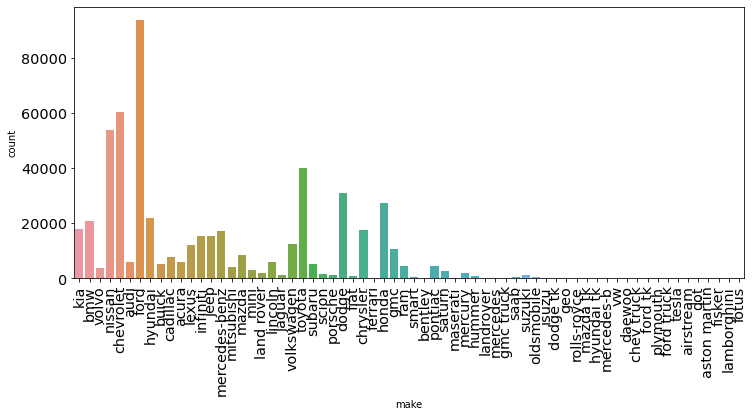

In [ ]:
plt.figure(figsize=(12,5))
chart = sns.countplot(x=df.make)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

- Based on the data above, an insight was found, that cars with the Ford brand are the most frequently sold cars

In [ ]:
len(df.model.unique())

974

In [ ]:
# lowercase data make 
df.model = df.model.str.lower()
len(df.model.unique())

852

In [ ]:
df.model.value_counts()

altima         19349
f-150          14479
fusion         12946
camry          12549
escape         11893
               ...  
cts-v wagon        1
350                1
carrera            1
420-class          1
320i               1
Name: model, Length: 851, dtype: int64

In [ ]:
len(df.body.unique())

87

In [ ]:
df.body.unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'van', 'regular-cab', 'g sedan', 'g coupe',
       'hatchback', 'king cab', 'supercrew', 'g convertible', 'coupe',
       'crew cab', 'wagon', 'double cab', 'e-series van', 'regular cab',
       'quad cab', 'g37 convertible', 'supercab', 'extended cab',
       'crew

In [ ]:
# lowercase data body 
df.body = df.body.str.lower()
len(df.body.unique())

46

In [ ]:
df.body.value_counts().head(10)

sedan          241343
suv            143844
hatchback       26237
minivan         25529
coupe           17752
crew cab        16394
wagon           16129
convertible     10476
supercrew        9033
g sedan          7417
Name: body, dtype: int64

Some observations on the above process:
* No duplicate data
* Some data in the `make` column was changed to lowercase so that the number of unique data from 97 changed to 67
* Some data in the `model` column was changed to lowercase so that the number of unique data from 974 changed to 852
* Some data in the `make` column was changed to lowercase so that the number of unique data from 87 changed to 46

## Univariate Analysis
After doing a simple descriptive statistical analysis, we now focus on one column at a time with *Univariate Analysis*

### Box plots

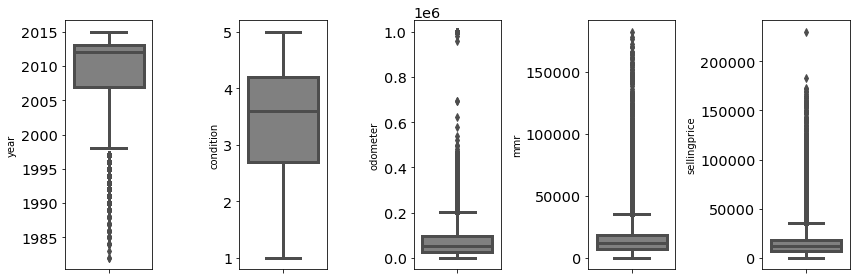

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

For boxplots, the most important thing we should pay attention to is the presence of outliers.
* Outliers are visible in almost every column except `condition`
* From the boxplot it can be seen which distribution is *skewed*: `year`, `odometer`, `mmr`,`sellingprice`

Conclusion:
* Cars produced in 1997 and below are considered data outliers.
* Based on the condition of the car, nothing is included in outlier data
* Cars with a total trip of more than 2000 km including outlier data.
* Cars with mmr more than 35000 including outlier data.
* Cars with a selling price of more than 35000 including outlier data.

### Dist plots

In [ ]:
df.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

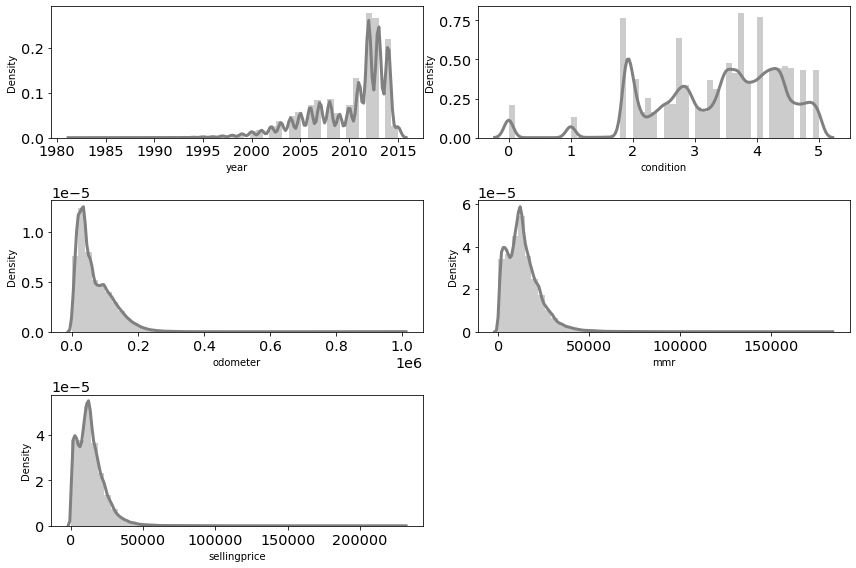

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

For distribution plots, the main thing to pay attention to is the type of distribution:
* As we would expect when we look at the boxplot above, the columns `year`, `odometer`, `mmr`,`sellingprice` *skewed*

Conclusion:
* That means there's a chance we might need to do something with those columns later
* Other than those columns, the distribution looks normal
* Majority of the car's manufacturing years are in the 2007-2013 range.
The oldest car sold was a 1982 car.
* The majority of cars sold are in class 3-4.

* The majority of the mileage of cars sold is 100-1000 km.
The car sold with the highest odometer is 10,000 km.

* The majority of car selling prices are in the range of 5000-15000.
The highest car price is 235000.

### Violin plots

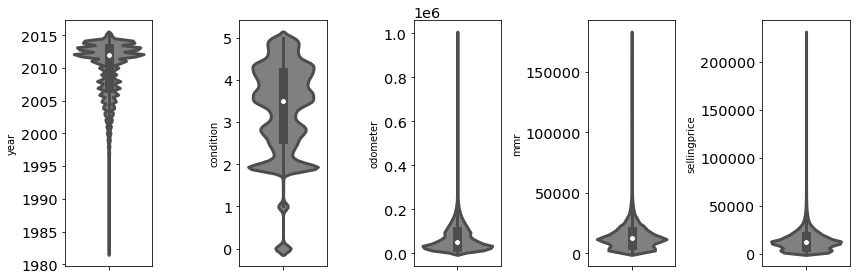

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

An alternative to the two plots above is the violin plot. By looking at the violin plot above, some *insight* that we find when looking at the box plot and distribution plot can also be observed.

### Count plot (categorical)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


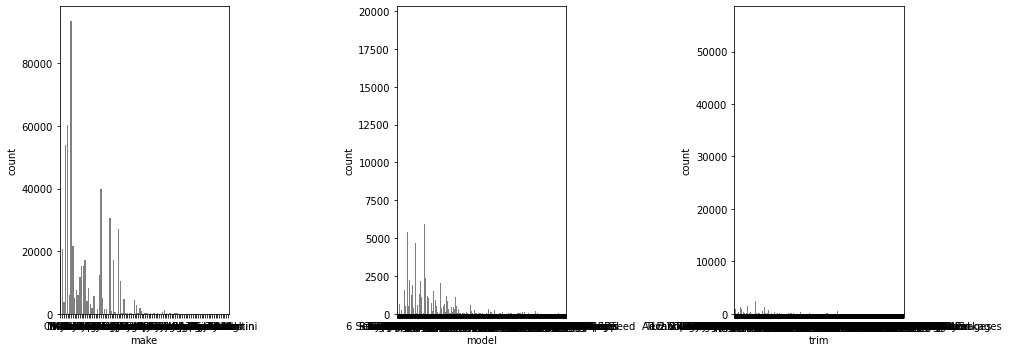

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1,3,1)
sns.countplot(df['make'], color='gray', orient='v')
plt.subplot(1,3,2)
sns.countplot(df['model'], color='gray', orient='v')
plt.subplot(1,3,3)
sns.countplot(df['trim'], color='gray', orient='v')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


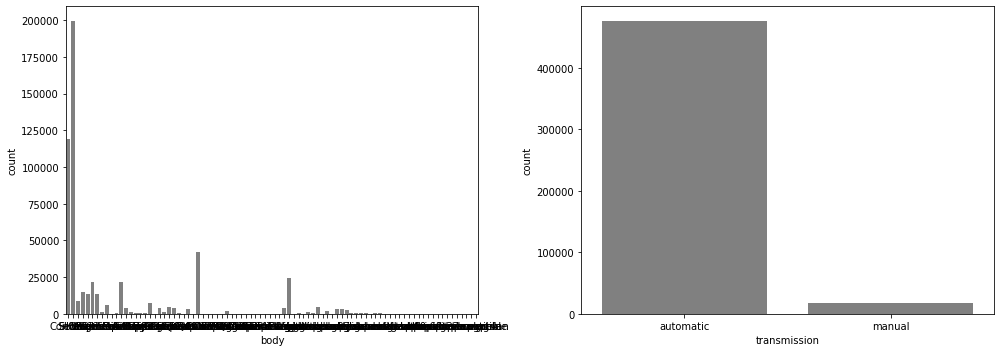

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
sns.countplot(df['body'], color='gray', orient='v')
plt.subplot(1,2,2)
sns.countplot(df['transmission'], color='gray', orient='v')
plt.tight_layout()

Based on the *count plot* above,

  - For the transmission category, it was found that cars with automatic transmissions were the most used used cars for sale

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


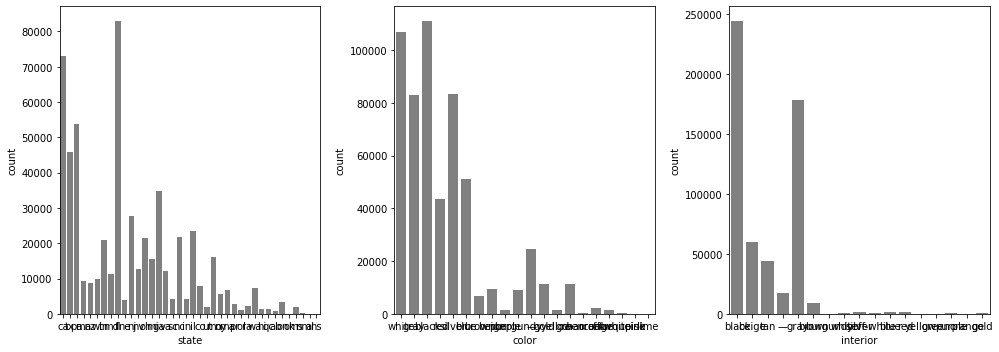

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1,3,1)
sns.countplot(df['state'], color='gray', orient='v')
plt.subplot(1,3,2)
sns.countplot(df['color'], color='gray', orient='v')
plt.subplot(1,3,3)
sns.countplot(df['interior'], color='gray', orient='v')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


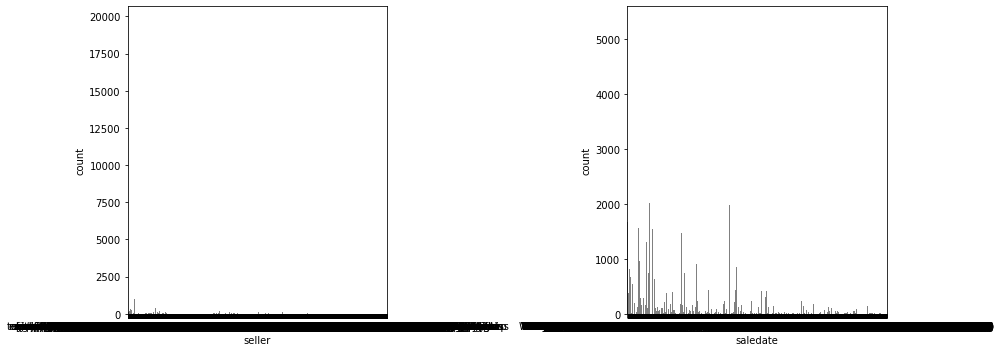

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
sns.countplot(df['seller'], color='gray', orient='v')
plt.subplot(1,2,2)
sns.countplot(df['saledate'], color='gray', orient='v')
plt.tight_layout()

## Bivariate Analysis

Having looked at each column individually, we will now look at the relationship between the columns. Knowing the relationships between columns can help us select the most important features and rule out redundant features.

### Correlation heatmap


In [ ]:
df.corr()

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.551282,-0.772720,0.596623,0.586488
condition,0.551282,1.000000,-0.538874,0.485050,0.538788
odometer,-0.772720,-0.538874,1.000000,-0.588107,-0.582405
mmr,0.596623,0.485050,-0.588107,1.000000,0.983634
sellingprice,0.586488,0.538788,-0.582405,0.983634,1.000000


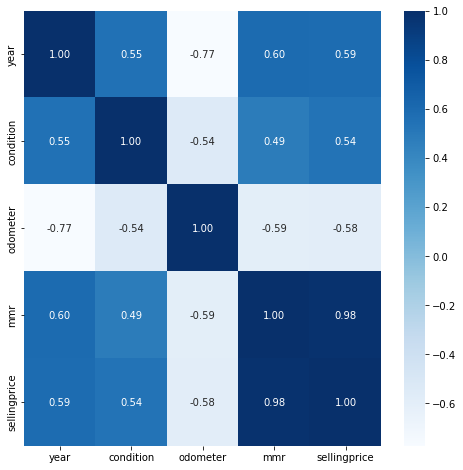

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

From the *correlation heatmap* above, it can be seen that:
* Our target `sellingprice` has a strong positive correlation with `year`
* Has a very strong positive correlation with `mmr`, but for this column it will not be used so in the next stage the `mmr` column can be dropped
* `condition` gives a strong positive correlation with `selling price` and `mmr`.
* `odometer` has a strong negative correlation with the other four features

### Pair plot

<Figure size 1080x1080 with 0 Axes>

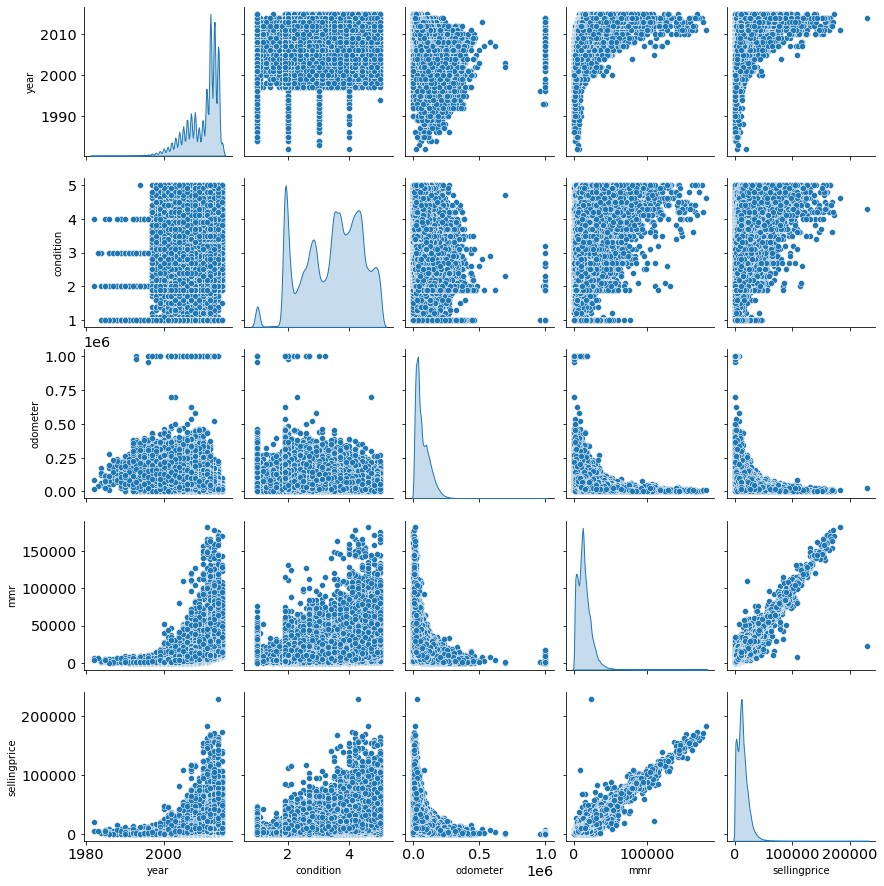

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

In [ ]:
df.sort_values(['odometer'], ascending=False)

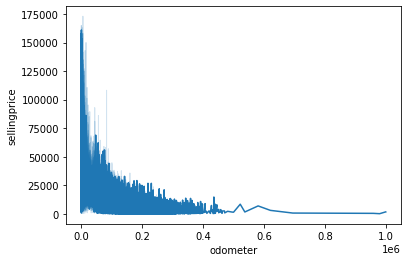

In [ ]:
sns.lineplot(x=df['odometer'],y=df['sellingprice'])

### Category plots

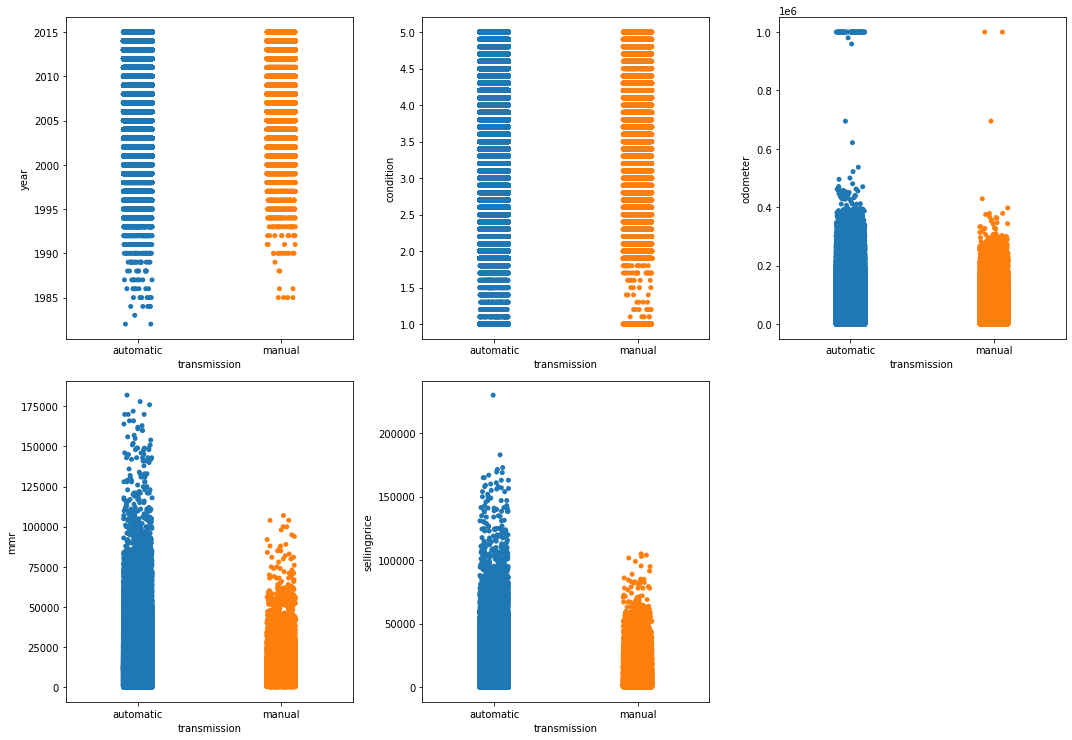

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='transmission', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout() # layout

    if i != 0: plt.close(i+1) # close figure 

    plt.close(len(nums) + 1) # close figure 

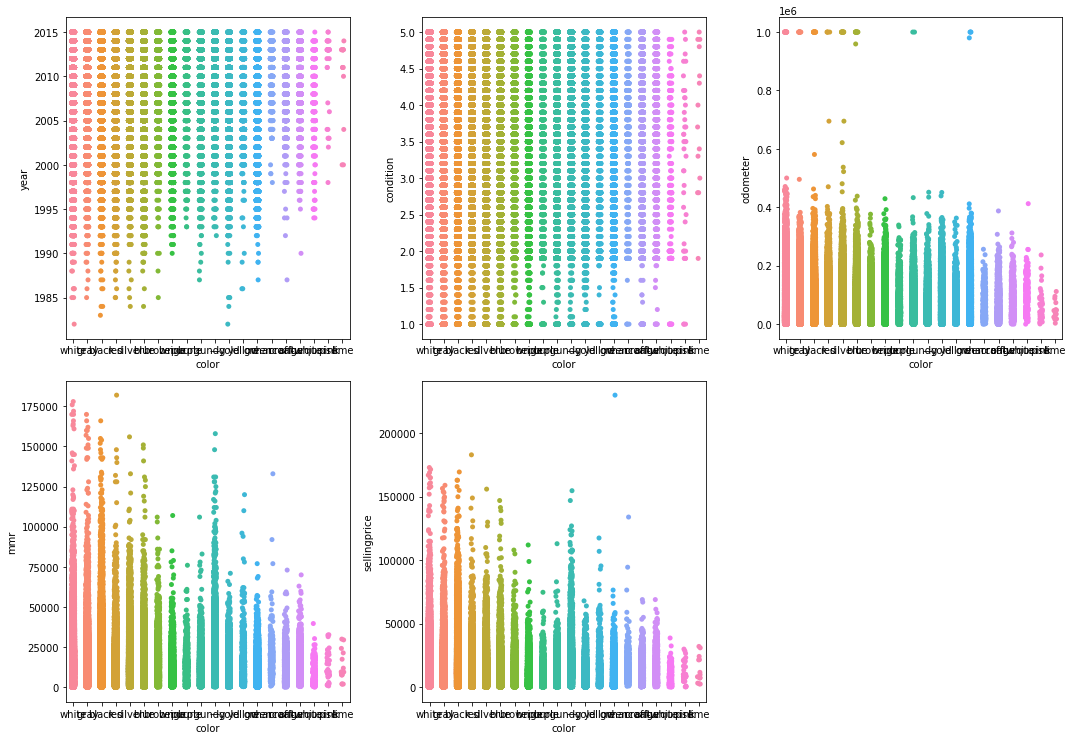

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='color', y=nums[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

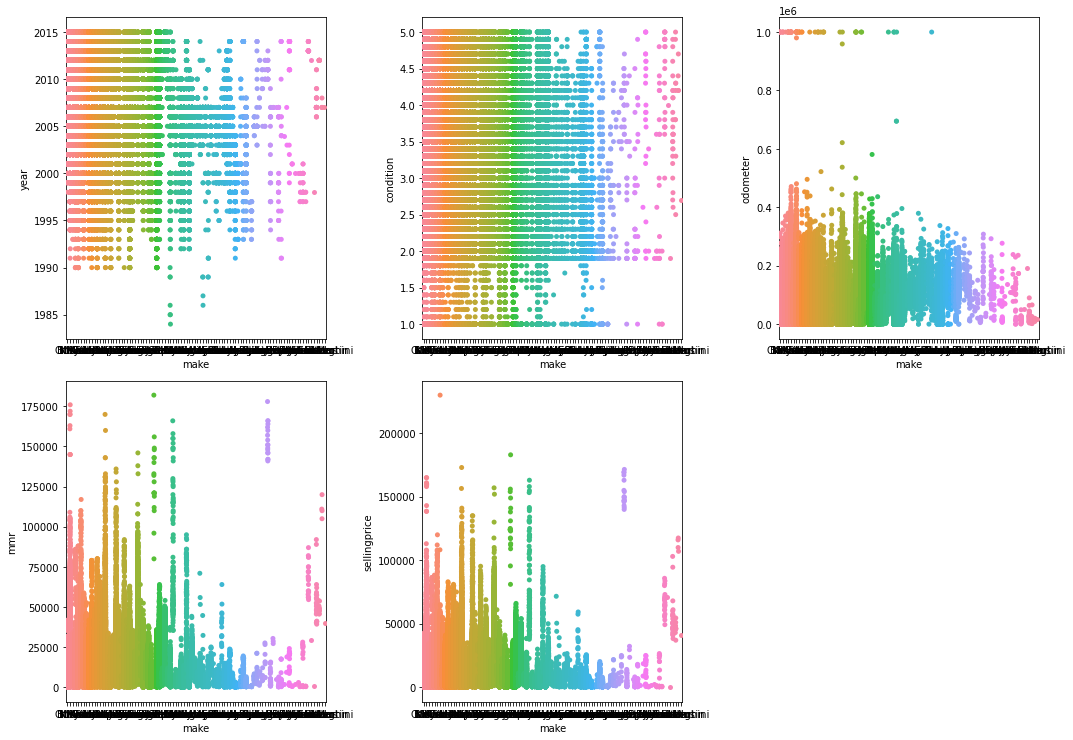

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='make', y=nums[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

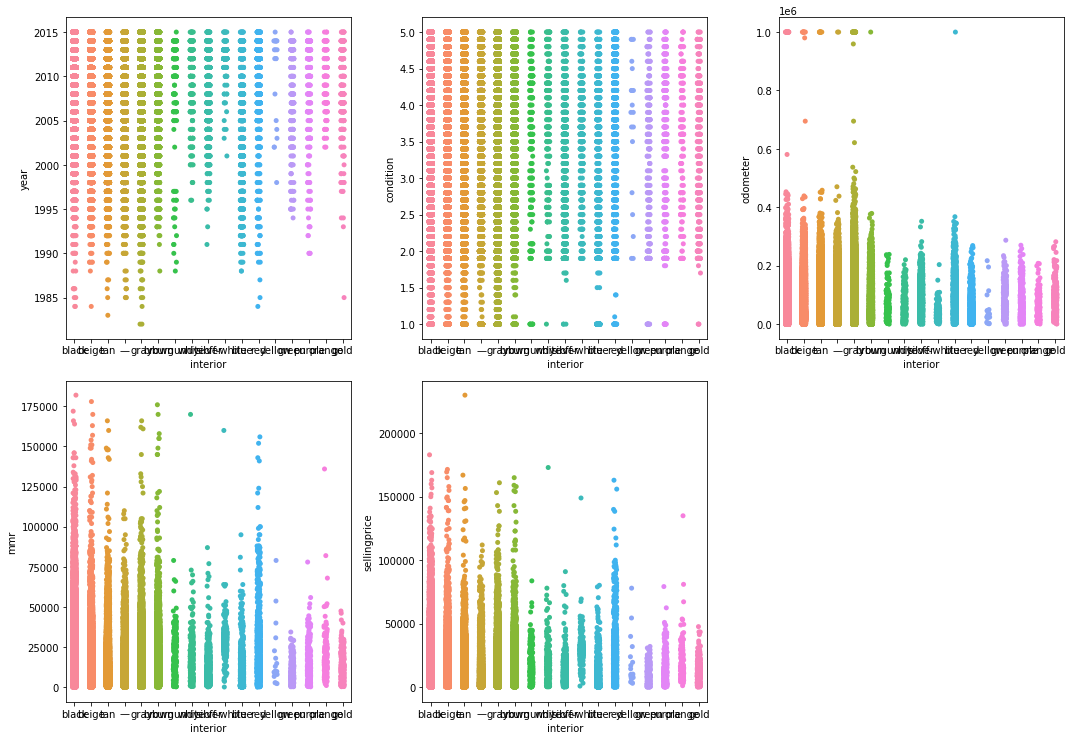

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='interior', y=nums[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

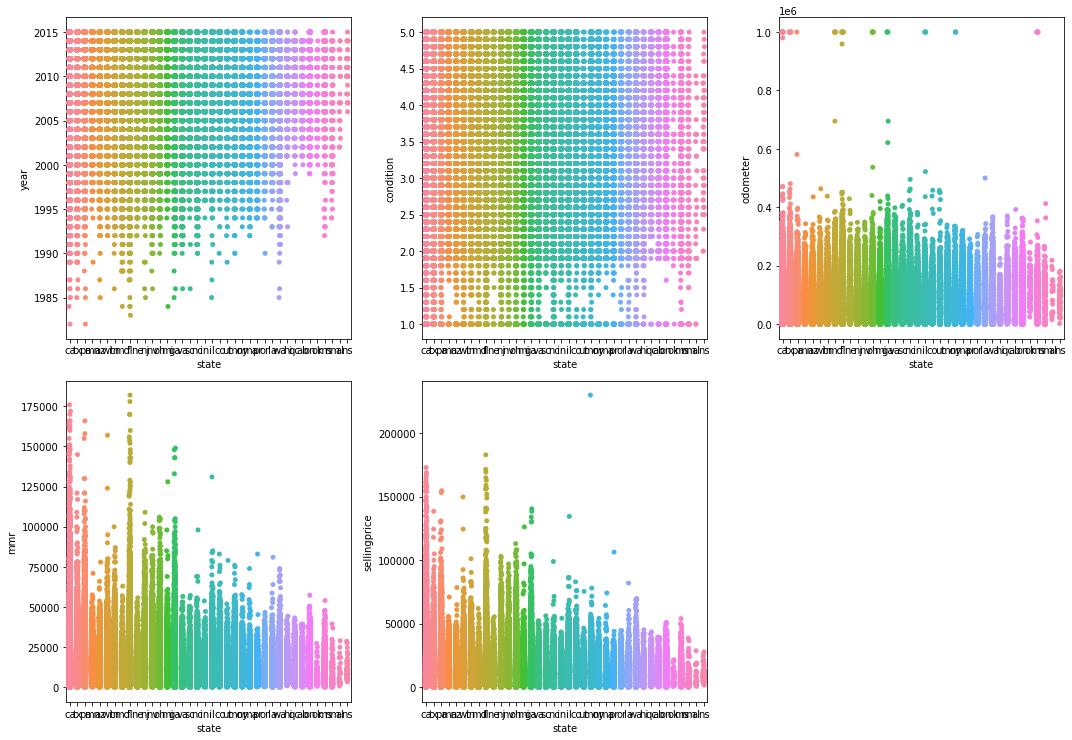

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='state', y=nums[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

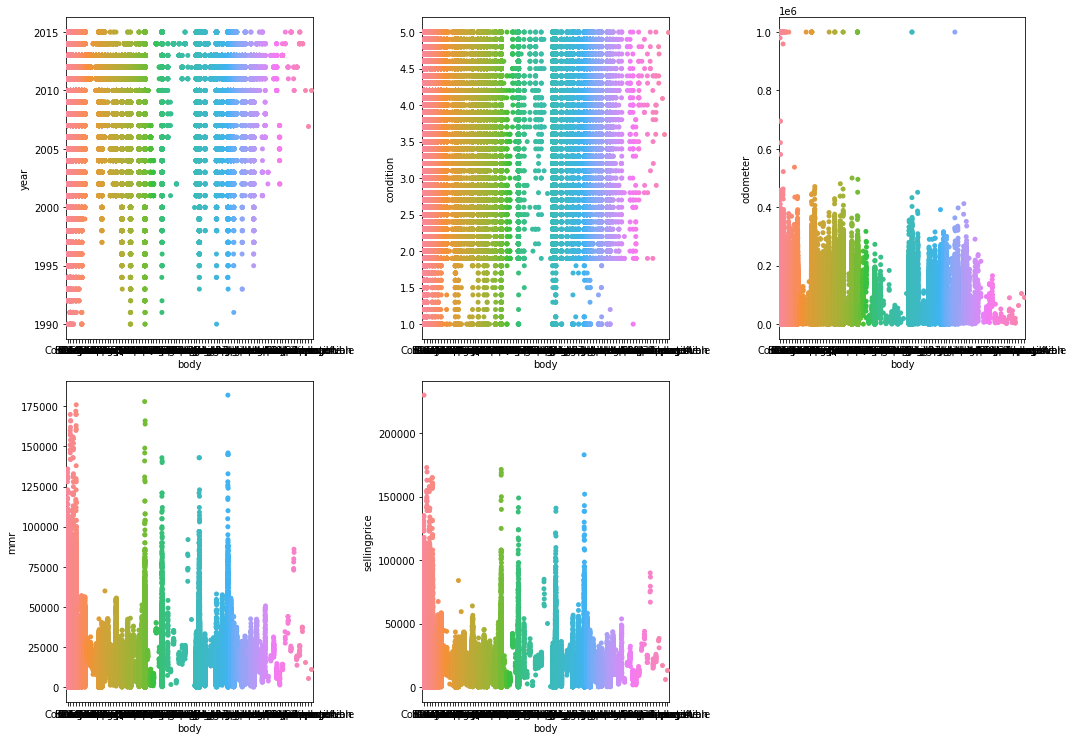

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='body', y=nums[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

## EDA Conclusion
Somethings that we found from this step are:
* The data looks valid and there are no defects
*However, there are still some empty/missing values, it must be considered at the preprocessing stage
* There are some distributions that are a bit *skewed*, this must be considered if we want to do something or use a model that requires the assumption of a normal distribution
* Some *features* have a noticeable correlation with *target*, they will be used for next step
* Some *features* like vin, state, interior, trim, seller, mmr look totally uncorrelated, they should be ignored/dropped

## Dataset Overview & Business Insight


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Price Segmentation')

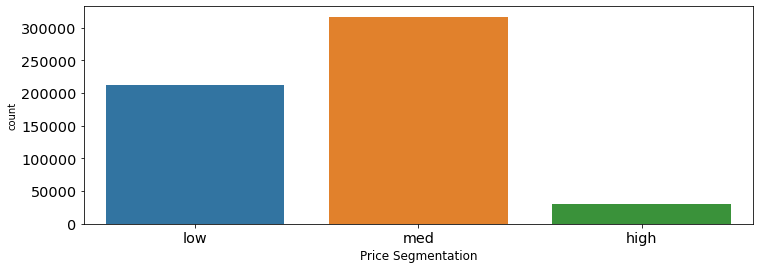

In [ ]:
df['pricesegmentation']=np.where(df['sellingprice']<10000,'low',np.where(df['sellingprice']>30000,'high','med'))
order = ['low', 'med', 'high']
sns.countplot(df['pricesegmentation'],order = order)
plt.xlabel('Price Segmentation',fontsize=12)

From the price segmentation above, it can be concluded that the majority of used car sales are in the medium price category.

Source:https://res.cloudinary.com/dkrav2qn2/images/w_1024,h_768/f_webp,q_auto/v1621681071/Used-car-market-in-US-Market-segmentation/Used-car-market-in-US-Market-segmentation-png?_i=AA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


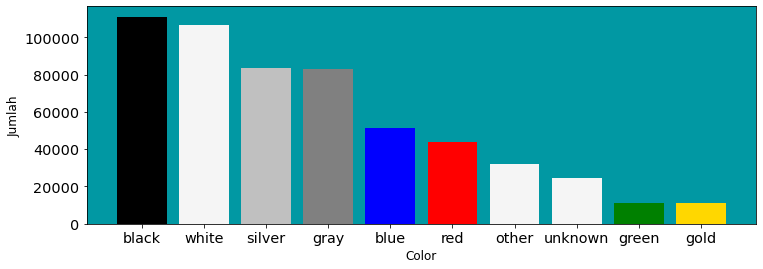

In [ ]:
jumlah_warna= df.groupby('color',as_index=False).agg(jumlah=('year','count'))

warna_terbesar= jumlah_warna.query('jumlah>10000')

warna_other= pd.Series(jumlah_warna.query('jumlah<=10000').sum())
warna_other.iloc[0]='other'

warna_gabungan= warna_terbesar.append(warna_other, ignore_index=True)
warna_gabungan.sort_values(by=['jumlah'], inplace=True,ascending=False)
plt.bar(data= warna_gabungan, x='color', height='jumlah',color=['black', 'whitesmoke', 'silver', 'gray', 'blue','red','whitesmoke','whitesmoke','green','gold'])
plt.xlabel('Color',fontsize=12)
plt.ylabel('Jumlah',fontsize=12)
nama = ('black', 'white', 'silver', 'gray', 'blue','red','other','unknown','green','gold')
plt.xticks(warna_gabungan['color'], nama)
ax = plt.axes()
ax.set_facecolor('#0198a3')

From the Bar Chart above, the most popular color is black with a total of 93245. Then followed by white and silver.

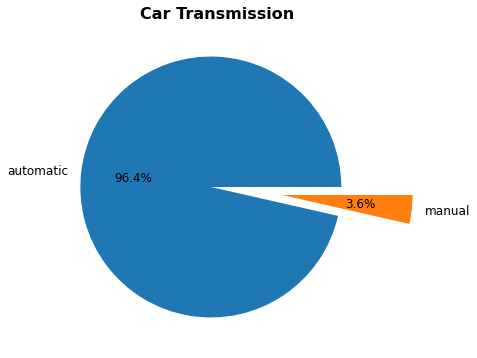

In [ ]:
df['transmission'].value_counts().plot.pie(explode=[0.05, 0.5], autopct='%1.1f%%', figsize=(6,6),fontsize=12)
plt.title('Car Transmission',fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.show()

From the transmission pie chart above it is found that most of the transmissions in this dataset are `automatic`.

In [ ]:
df=df.dropna()
df.body = df.body.str.lower()
len(df.body.unique())

body_list=[]

for index,kolom in df.iterrows():
  body=kolom['body']
  if body.endswith('cab')==True:
    bodies= 'cab'
  elif body.startswith('cab')==True:
    bodies= 'cab'
  elif body.endswith('coupe')==True:
    bodies= 'coupe'
  elif body.endswith('koup')==True:
    bodies= 'coupe'
  elif body.endswith('van')==True:
    bodies= 'van'
  elif body.endswith('wagon')==True:
    bodies= 'wagon'
  elif body.endswith('convertible')==True:
    bodies= 'convertible'
  elif body.endswith('suv')==True:
    bodies= 'suv'
  elif body.endswith('sedan')==True:
    bodies= 'sedan'
  elif body.endswith('hatchback')==True:
    bodies= 'hatchback'
  else:
    bodies='others'
  body_list.append(bodies)

df['body']=body_list

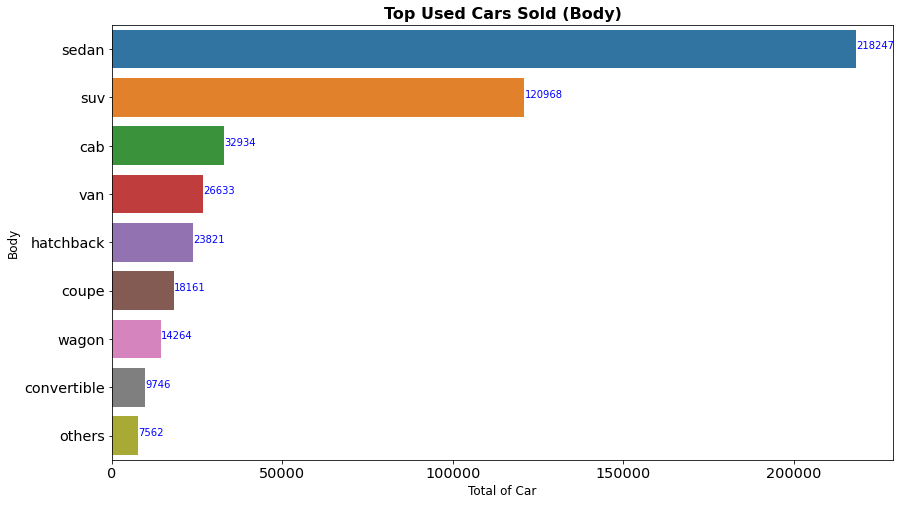

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(y='body', data=df,order=pd.value_counts(df['body']).index)
for i, v in enumerate(pd.value_counts(df['body']).iloc[:9]):
    plt.text(v+100, i, str(v), color='blue')
plt.xlabel('Total of Car',fontsize=12)
plt.ylabel('Body',fontsize=12)
plt.title('Top Used Cars Sold (Body)',fontsize=16, fontweight='bold')
plt.show()

From the chart above, it is known that consumers are more interested in buying a sedan type car when compared to others.

In [ ]:
df.make = df.make.str.lower()

def brand_top10list(x):
  if x['make'] == 'ford':
    brand_top10list = 'ford'
  elif x['make'] == 'chevrolet':
    brand_top10list = 'chevrolet'
  elif x['make'] == 'nissan':
    brand_top10list = 'nissan'
  elif x['make'] == 'toyota':
    brand_top10list = 'toyota'
  elif x['make'] == 'dodge':
    brand_top10list = 'dodge'
  elif x['make'] == 'honda':
    brand_top10list = 'honda'
  elif x['make'] == 'hyundai':
    brand_top10list = 'hyundai'
  elif x['make'] == 'bmw':
    brand_top10list = 'bmw'
  elif x['make'] == 'kia':
    brand_top10list = 'kia'
  elif x['make'] == 'chrysler':
    brand_top10list = 'chrysler'
  elif x['make'] == 'infiniti':
    brand_top10list = 'infiniti'
  elif x['make'] == 'mercedes-benz':
    brand_top10list = 'merce'
  elif x['make'] == 'jeep':
    brand_top10list = 'jeep'
  elif x['make'] == 'volkswagen':
    brand_top10list = 'volkswagen'
  elif x['make'] == 'lexus':
    brand_top10list = 'lexus'
  elif x['make'] == 'gmc':
    brand_top10list = 'gmc'
  elif x['make'] == 'mazda':
    brand_top10list = 'mazda'
  elif x['make'] == 'lincoln':
    brand_top10list = 'lincoln'
  elif x['make'] == 'audi':
    brand_top10list = 'audi'
  else:
    brand_top10list = 'others'
  return brand_top10list

df['top_20_brand'] = df.apply(lambda x: brand_top10list(x), axis=1)

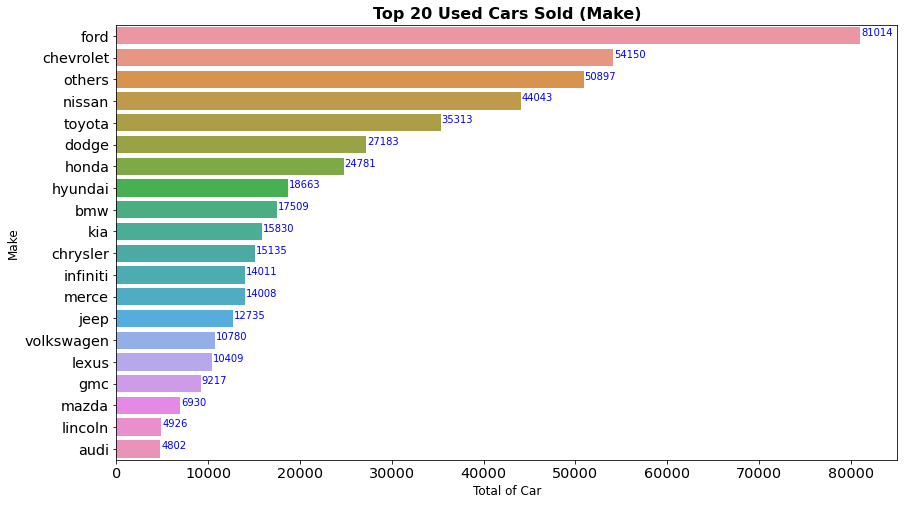

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(y='top_20_brand', data=df,order=pd.value_counts(df['top_20_brand']).index)
for i, v in enumerate(pd.value_counts(df['top_20_brand']).iloc[:20]):
    plt.text(v+100, i, str(v), color='blue')
plt.xlabel('Total of Car',fontsize=12)
plt.ylabel('Make',fontsize=12)
plt.title('Top 20 Used Cars Sold (Make)',fontsize=16, fontweight='bold')
plt.show()

* By selecting the top 20 sales from the make column to the top_20_brand column, it will cover several brand categories (make) that have a high selling value and quite a lot of sales. Like the BMW category.
* From the histogram plot, the selection of 20 brands with the most sales for the next stage is considered quite appropriate, because if only 10 brands are selected, there will be several best-selling sales and those with low-high price ranges will be placed in `others` categories.

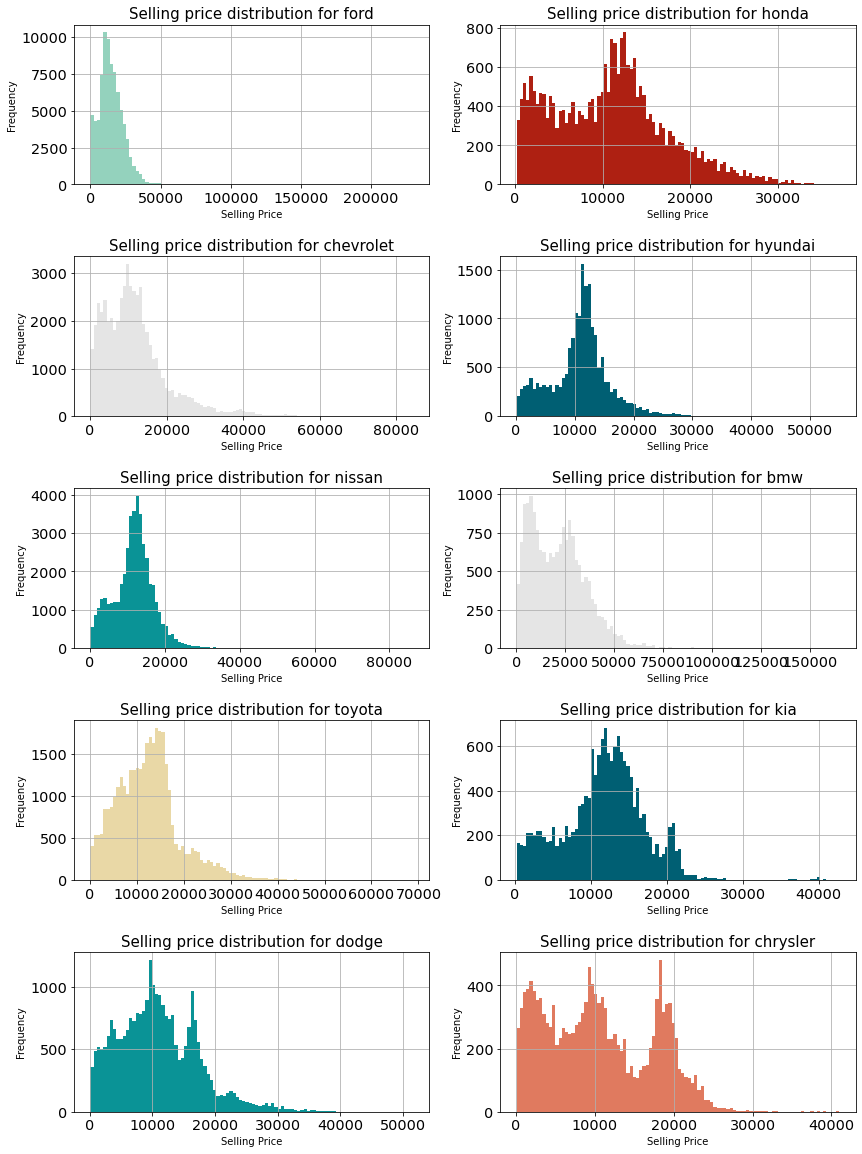

In [ ]:
top_make=df['make'].value_counts()[:10].index
fig,ax=plt.subplots(5,2,figsize=(14,20))
color_list=['#0a9396','#ca6702','#ae2012','#9b2226','#001219','#005f73','#94d2bd','#e9d8a6','#e5e5e5','#e07a5f'] #coolors.co
i=0
for t in top_make:
    df.loc[df['make']==t,'sellingprice'].hist(ax=ax[i%5][i//5],bins=100,color=np.random.choice(color_list,replace=False))
    ax[i%5][i//5].set_xlabel('Selling Price',fontsize=10)
    ax[i%5][i//5].set_ylabel('Frequency',fontsize=10)
    ax[i%5][i//5].set_title(f'Selling price distribution for {t}',fontsize=15)
    plt.subplots_adjust(hspace=0.45)
    i+=1

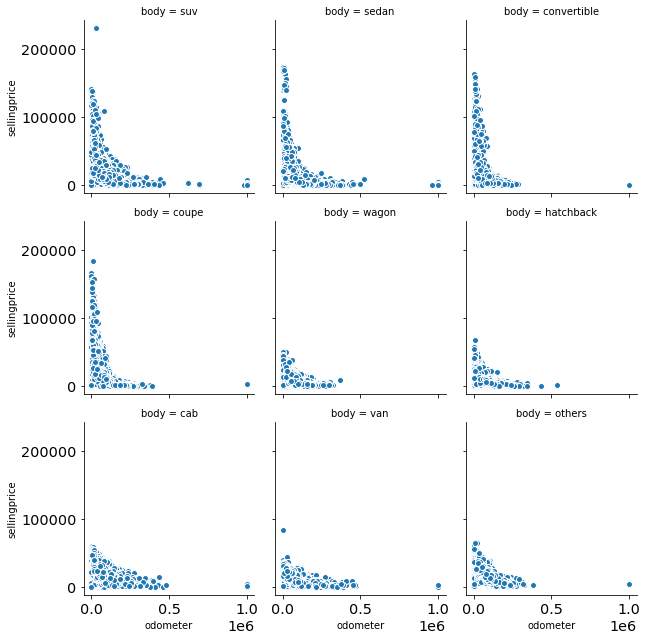

In [ ]:
graph = sns.FacetGrid(df, col ="body",col_wrap=3)
graph.map(plt.scatter, "odometer", "sellingprice", edgecolor ="w").add_legend()
plt.show()

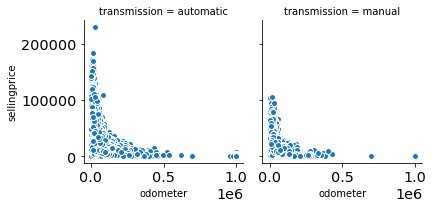

In [ ]:
graph = sns.FacetGrid(df, col ="transmission")
graph.map(plt.scatter, "odometer", "sellingprice", edgecolor ="w").add_legend()
plt.show()

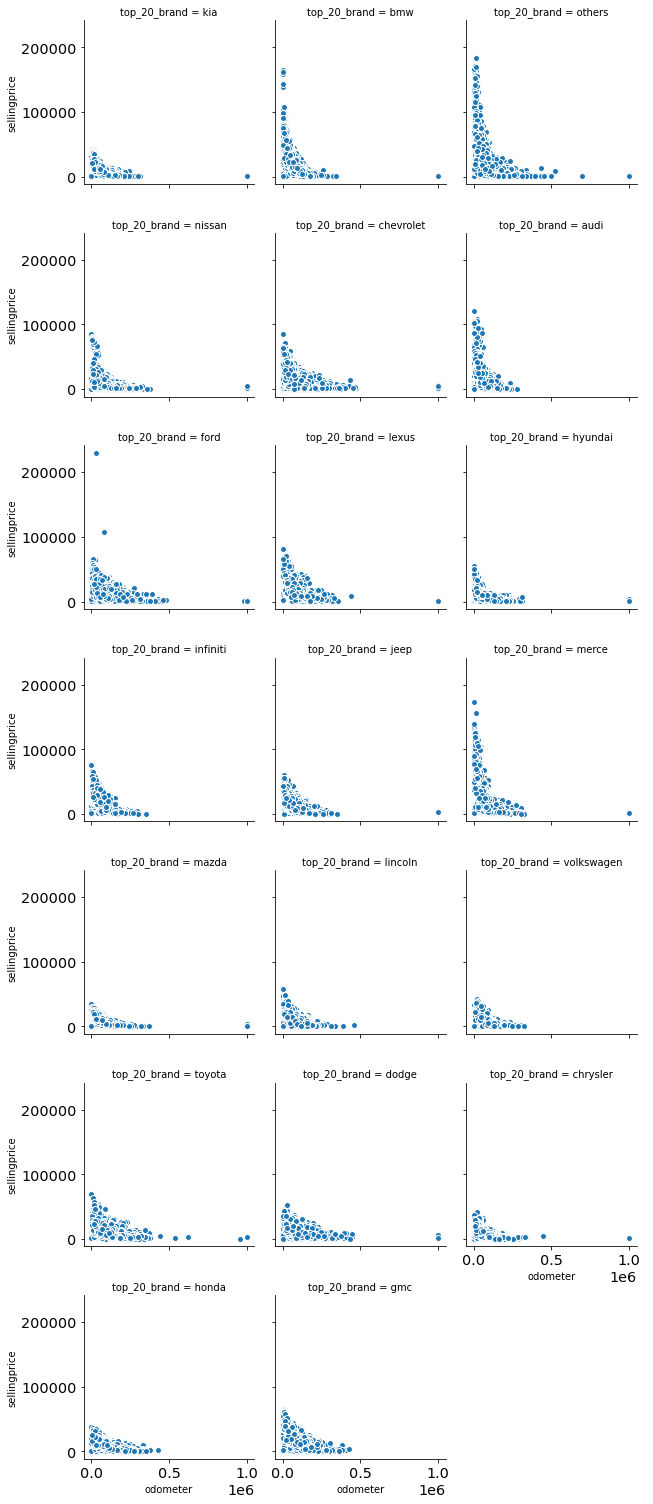

In [ ]:
graph = sns.FacetGrid(df, col ="top_20_brand",col_wrap=3)
graph.map(plt.scatter, "odometer", "sellingprice", edgecolor ="w").add_legend()
plt.show()

In [ ]:
def drop_val(col):
    idx_to_drop = []
    for i in col.index:
        idx_to_drop.append(i)

    df.drop(idx_to_drop,inplace=True)
    df.reset_index(drop=True,inplace=True)
    
fixed_date = []
for i in range(len(df['saledate'])):
    date = df.saledate[i][:15]
    fixed_date.append(date)
    
df['saledate'] = fixed_date
df['saledate'] = pd.to_datetime(df['saledate'])
date_not_use = df[(df['saledate'] < '2014-12-01')]  # Deleting this data because there aren't enough data for that range of date 
drop_val(date_not_use)    

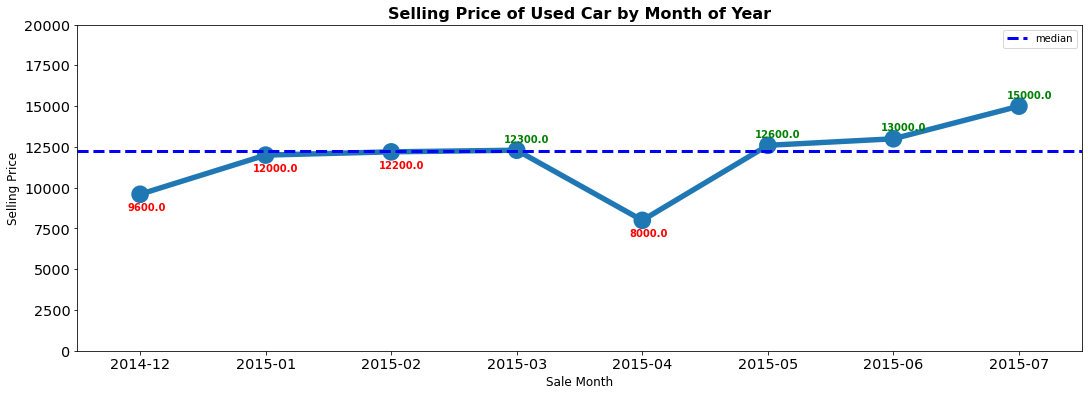

In [ ]:
median_saledate = df.groupby(df['saledate'].dt.strftime('%Y-%m')).median()
plt.figure(figsize=(18,6))
plt.title('Selling Price of Used Car by Month of Year',fontsize=16, fontweight='bold')
sns.pointplot(x=median_saledate.index,y=median_saledate['sellingprice'], data=median_saledate,ci=None)
for i, v in enumerate(median_saledate['sellingprice']):
    if v >= np.median(median_saledate['sellingprice']):
        plt.text(i-0.1, v+500, str(v), color='green', fontweight='bold')
    else:
        plt.text(i-0.1, v-1000, str(v), color='red', fontweight='bold')
                    
plt.axhline(np.median(median_saledate['sellingprice']),color='blue', linestyle='--', label='median')
plt.ylabel ('Selling Price',fontsize=12)
plt.xlabel('Sale Month',fontsize=12)
plt.ylim(0,20000)
plt.legend()
plt.show()

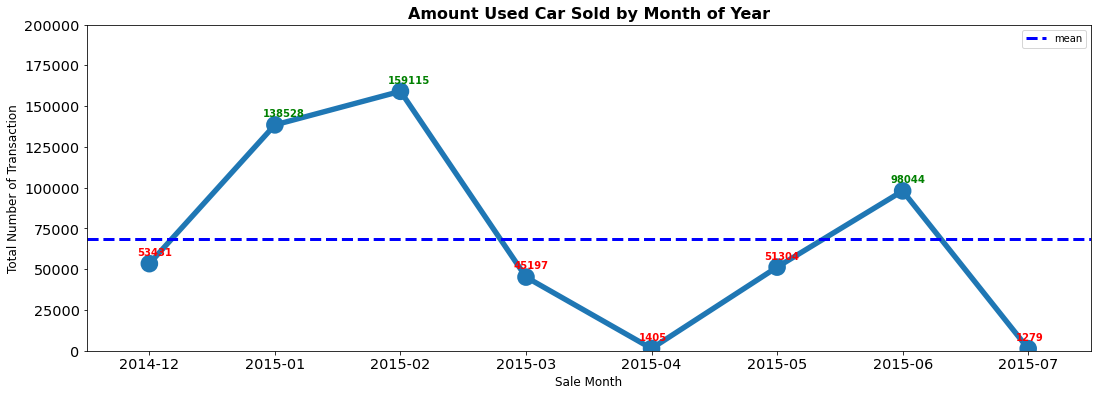

In [ ]:
yr_gb = df.groupby(df['saledate'].dt.strftime('%Y-%m')).count()
plt.figure(figsize=(18,6))
plt.title('Amount Used Car Sold by Month of Year',fontsize=16, fontweight='bold')
sns.pointplot(x=yr_gb.index,y=yr_gb['make'], data=yr_gb,ci=None)
for i, v in enumerate(yr_gb['make']):
    if v >= np.mean(yr_gb['make']):
        plt.text(i-0.1, v+5000, str(v), color='green', fontweight='bold')
    else:
        plt.text(i-0.1, v+5000, str(v), color='red', fontweight='bold')
                    
plt.axhline(np.mean(yr_gb['make']),color='blue', linestyle='--', label='mean')
plt.ylabel ('Total Number of Transaction',fontsize=12)
plt.xlabel('Sale Month',fontsize=12)
plt.ylim(0,200000)
plt.legend()
plt.show()

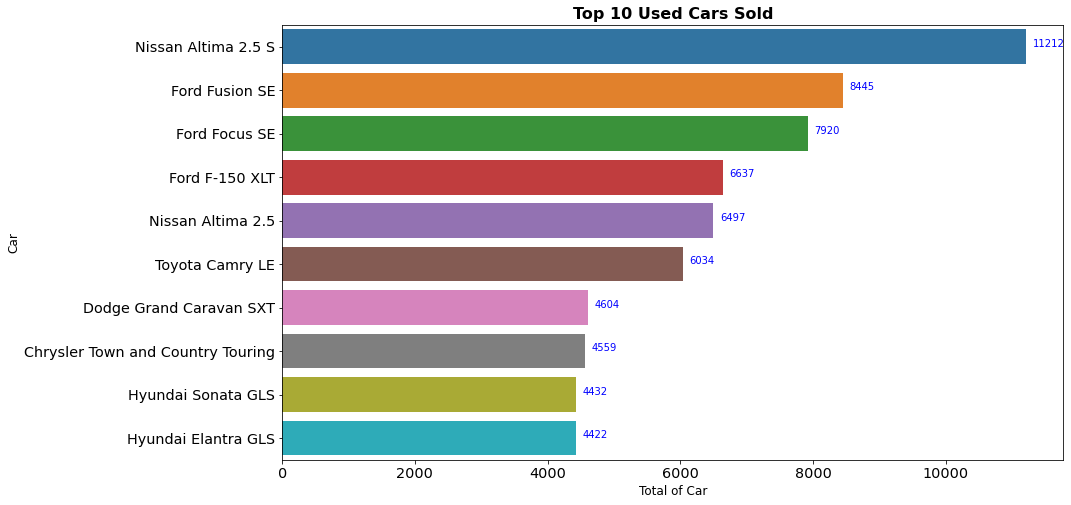

In [ ]:
df['combined'] = df['make'].str.cat(df[['model','trim']].astype(str), sep=' ')
plt.figure(figsize=(14,8))
sns.countplot(y='combined',data=df,order=pd.value_counts(df['combined']).iloc[:10].index)
for i, v in enumerate(pd.value_counts(df['combined']).iloc[:10]):
    plt.text(v+100, i, str(v), color='blue')
plt.xlabel('Total of Car',fontsize=12)
plt.ylabel('Car',fontsize=12)
plt.title('Top 10 Used Cars Sold',fontsize=16, fontweight='bold')
plt.show()

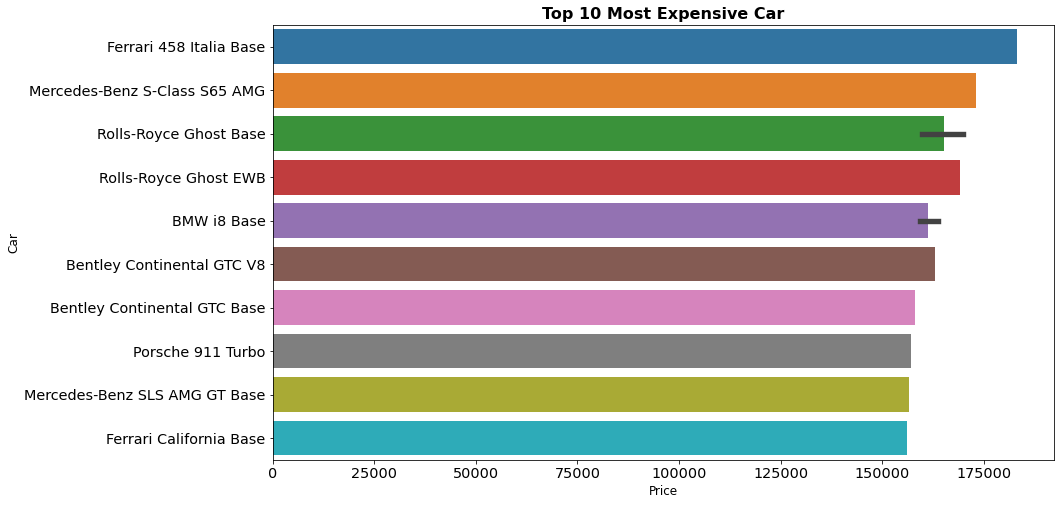

In [ ]:
df_sort=df.sort_values(by='sellingprice',ascending=False,ignore_index=True)
df_sort=df_sort.iloc[1:20]
plt.figure(figsize=(14,8))
sns.barplot(y='combined',x='sellingprice',data=df_sort)
plt.xlabel('Price',fontsize=12)
plt.ylabel('Car',fontsize=12)
plt.title('Top 10 Most Expensive Car',fontsize=16, fontweight='bold')
plt.show()

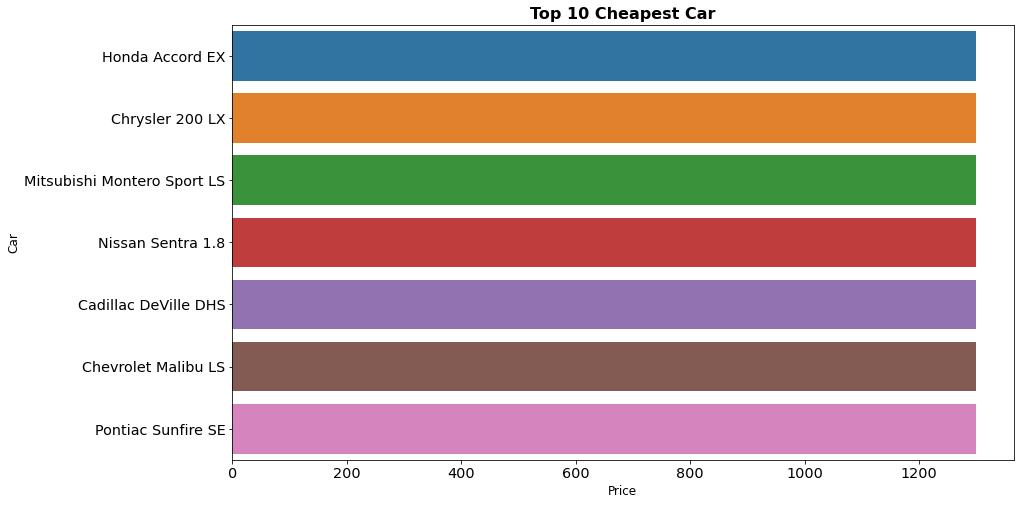

In [ ]:
df_sort=df.sort_values(by='sellingprice',ascending=True,ignore_index=True)
df_sort=df_sort[~(df_sort['sellingprice'] < 1300) ]
df_sort=df_sort.iloc[:10]
plt.figure(figsize=(14,8))
sns.barplot(y='combined',x='sellingprice',data=df_sort)
plt.xlabel('Price',fontsize=12)
plt.ylabel('Car',fontsize=12)
plt.title('Top 10 Cheapest Car',fontsize=16, fontweight='bold')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


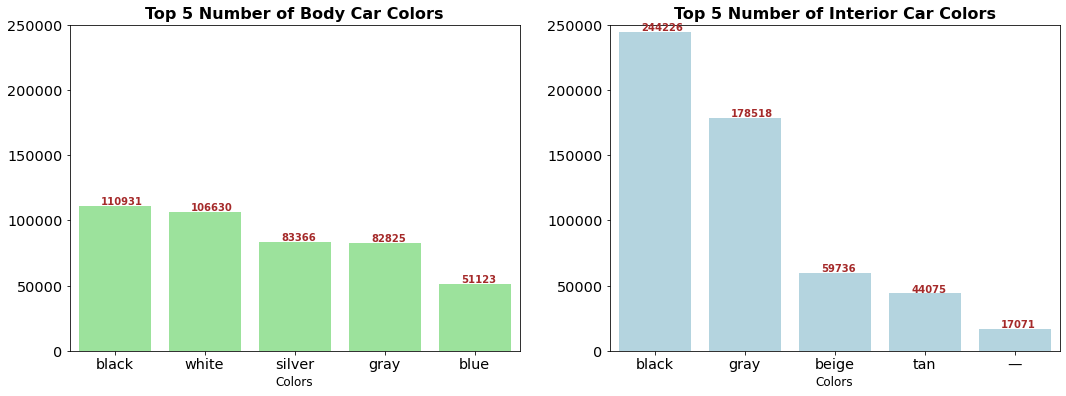

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(10,6))
sns.barplot(df['color'].value_counts().iloc[:5].index,df['color'].value_counts().iloc[:5],color='lightgreen', ax=ax[0])
for i, v in enumerate(df['color'].value_counts().iloc[:5]):
    ax[0].text(i-0.15, v+1000, str(v), color='brown', fontweight='bold')
sns.barplot(df['interior'].value_counts().iloc[:5].index,df['interior'].value_counts().iloc[:5],color='lightblue', ax=ax[1])
for i, v in enumerate(df['interior'].value_counts().iloc[:5]):
    ax[1].text(i-0.15, v+1000, str(v), color='brown', fontweight='bold')
ax[0].set_title('Top 5 Number of Body Car Colors',fontsize = 16, fontweight='bold')
ax[0].set_xlabel('Colors',fontsize = 12)
ax[0].set_ylabel(None)
ax[1].set_title('Top 5 Number of Interior Car Colors',fontsize = 16, fontweight='bold')
ax[1].set_xlabel('Colors',fontsize = 12)
ax[1].set_ylabel(None)
ax[0].set_ylim(0,250000)
ax[1].set_ylim(0,250000)
fig.show()

plt.subplots_adjust(right = 1.5)

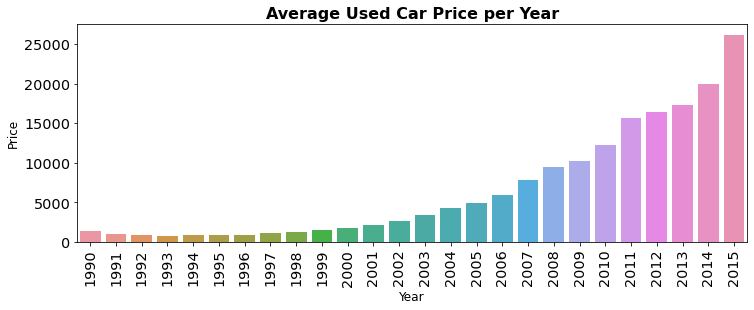

In [ ]:
df_clean=df.dropna()
df_groupby=df_clean.groupby(by='year').mean().reset_index()
sns.barplot(x='year',y='sellingprice',data=df_groupby)
plt.xticks(rotation=90)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.title('Average Used Car Price per Year',fontsize=16, fontweight='bold')
plt.show();

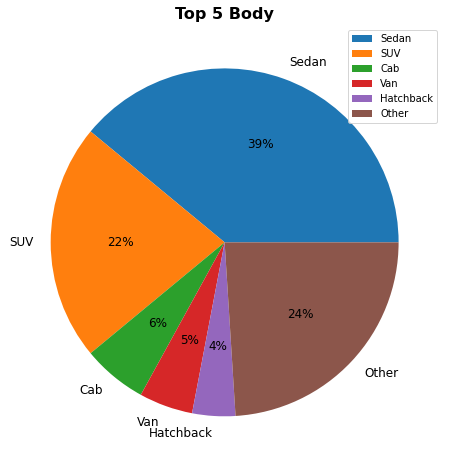

In [ ]:
dfbody = pd.DataFrame({'Percentage': [39,22,6,5,4,24]},
                  index=['Sedan', 'SUV',
                              'Cab', 'Van','Hatchback','Other'])
dfbody.plot.pie(y='Percentage', autopct='%1.0f%%', figsize=(8,8),fontsize=12)
plt.title('Top 5 Body',fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.show()

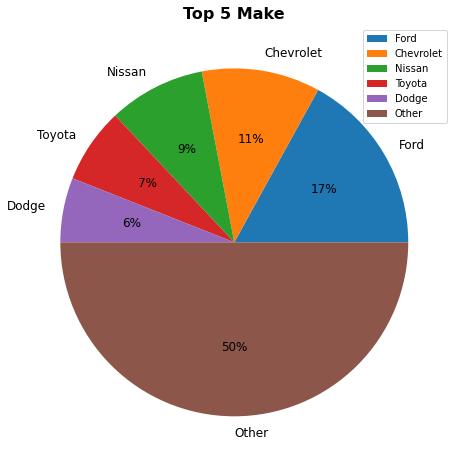

In [ ]:
dfmake = pd.DataFrame({'Percentage': [17,11,9,7,6,50]},
                  index=['Ford', 'Chevrolet',
                              'Nissan', 'Toyota','Dodge','Other'])
dfmake.plot.pie(y='Percentage', autopct='%1.0f%%', figsize=(8,8),fontsize=12)
plt.title('Top 5 Make',fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.show()

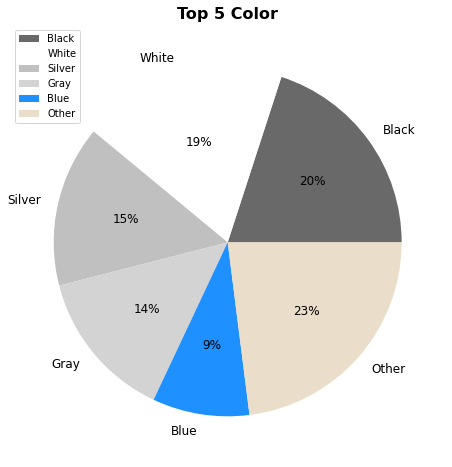

In [ ]:
dfcolor = pd.DataFrame({'Percentage': [20,19,15,14,9,23]},
                  index=['Black', 'White',
                              'Silver', 'Gray','Blue','Other'])
colors = ['#696969', '#FFFFFF', '#C0C0C0', '#d3d3d3','#1e90ff','#EADDCA']
dfcolor.plot.pie(y='Percentage', autopct='%1.0f%%', figsize=(8,8),fontsize=12,colors=colors)
plt.title('Top 5 Color',fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.show()

# Stage 2 Final Project - Data Pre-processing 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/car_prices.csv',error_bad_lines=False,warn_bad_lines=True)
df.head()

b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499085: expected 16 fields, saw 17\nSkipping line 501457: expected 16 fields, saw 17\nSkipping line 505301: expected 16 fields, saw 17\nSkipping line 505308: expected 16 fields, saw 17\nSkipping line 520463: expected 16 fields, saw 17\n'
b'Skipping line 528998: expected 1

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
#Drop Kolom yang tidak di pakai
df.drop(['vin','state', 'interior', 'trim', 'seller', 'mmr'], inplace=True, axis=1)

In [ ]:
df.head()

,year,make,model,body,transmission,condition,odometer,color,sellingprice,saledate
0,2015,Kia,Sorento,SUV,automatic,5.0,16639.0,white,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,SUV,automatic,5.0,9393.0,white,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,Sedan,automatic,4.5,1331.0,gray,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,Sedan,automatic,4.1,14282.0,white,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,Sedan,automatic,4.3,2641.0,gray,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   body          545616 non-null  object 
 4   transmission  493458 non-null  object 
 5   condition     547017 non-null  float64
 6   odometer      558717 non-null  float64
 7   color         558062 non-null  object 
 8   sellingprice  558811 non-null  int64  
 9   saledate      558811 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 42.6+ MB


In [ ]:
cats = ['make', 'model', 'body', 'transmission','color','saledate']
nums = ['year', 'condition', 'odometer', 'sellingprice']

In [ ]:
df[nums].describe()

,year,condition,odometer,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13611.262461
std,3.966812,0.949439,53397.752933,9749.656919
min,1982.000000,1.000000,1.000000,1.000000
25%,2007.000000,2.700000,28374.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18200.000000
max,2015.000000,5.000000,999999.000000,230000.000000


In [ ]:
df.sort_values(by='sellingprice')

,year,make,model,body,transmission,condition,odometer,color,sellingprice,saledate
48453,2003,Mercedes-Benz,E-Class,Sedan,automatic,2.1,1.0,black,1,Tue Jan 06 2015 09:30:00 GMT-0800 (PST)
348252,1995,Isuzu,Rodeo,SUV,NaN,1.0,254132.0,red,1,Wed Mar 04 2015 01:05:00 GMT-0800 (PST)
293223,2014,Ford,E-Series Van,E-Series Van,automatic,4.1,31886.0,white,1,Thu Feb 12 2015 03:00:00 GMT-0800 (PST)
7566,2002,Ford,F-350 Super Duty,Crew Cab,NaN,2.0,NaN,white,1,Thu Feb 05 2015 04:00:00 GMT-0800 (PST)
30275,1993,NaN,NaN,NaN,automatic,1.0,39750.0,white,100,Tue Jan 20 2015 16:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...
125095,2012,Rolls-Royce,Ghost,Sedan,automatic,4.5,14316.0,black,169500,Wed Jan 14 2015 01:40:00 GMT-0800 (PST)
545500,2013,Rolls-Royce,Ghost,sedan,automatic,4.2,7852.0,white,171500,Wed Jun 17 2015 03:05:00 GMT-0700 (PDT)
446941,2015,Mercedes-Benz,S-Class,Sedan,automatic,4.1,5277.0,white,173000,Thu May 21 2015 05:00:00 GMT-0700 (PDT)
548146,2011,Ferrari,458 Italia,coupe,automatic,4.6,12116.0,red,183000,Wed Jun 17 2015 03:40:00 GMT-0700 (PDT)


In [ ]:
df[cats].describe()

,make,model,body,transmission,color,saledate
count,548510,548412,545616,493458,558062,558811
unique,96,973,86,2,20,3745
top,Ford,Altima,Sedan,automatic,black,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,199437,475914,110970,5334


## Missing Data

In [ ]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

transmission    11.695010
body             2.361263
condition        2.110553
model            1.860915
make             1.843378
color            0.134035
odometer         0.016821
saledate         0.000000
sellingprice     0.000000
year             0.000000
dtype: float64

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472336 entries, 0 to 558810
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472336 non-null  int64  
 1   make          472336 non-null  object 
 2   model         472336 non-null  object 
 3   body          472336 non-null  object 
 4   transmission  472336 non-null  object 
 5   condition     472336 non-null  float64
 6   odometer      472336 non-null  float64
 7   color         472336 non-null  object 
 8   sellingprice  472336 non-null  int64  
 9   saledate      472336 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 39.6+ MB


In [ ]:
df.isna().sum()

year            0
make            0
model           0
body            0
transmission    0
condition       0
odometer        0
color           0
sellingprice    0
saledate        0
dtype: int64

In [ ]:
df[nums].describe()

,year,condition,odometer,sellingprice
count,472336.000000,472336.000000,472336.000000,472336.000000
mean,2010.211045,3.426576,66701.070003,13690.403670
std,3.822131,0.943659,51939.183430,9612.962279
min,1990.000000,1.000000,1.000000,1.000000
25%,2008.000000,2.700000,28137.000000,7200.000000
50%,2012.000000,3.600000,51084.000000,12200.000000
75%,2013.000000,4.200000,96589.000000,18200.000000
max,2015.000000,5.000000,999999.000000,230000.000000


## Duplicated Data

In [ ]:
df.duplicated().sum()

0

Kolom Make (Brand)

In [ ]:
df.make.unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Buick', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'FIAT', 'Chrysler',
       'Ferrari', 'Honda', 'GMC', 'Ram', 'smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'Saab', 'Suzuki',
       'Oldsmobile', 'Rolls-Royce', 'Isuzu', 'Plymouth', 'Tesla',
       'Aston Martin', 'Geo', 'Fisker', 'Daewoo', 'Lamborghini', 'Lotus'],
      dtype=object)

In [ ]:
df.make = df.make.str.lower()

In [ ]:
len(df.make.unique())

53

In [ ]:
df['make'].value_counts()

ford             81014
chevrolet        54150
nissan           44043
toyota           35313
dodge            27183
honda            24781
hyundai          18663
bmw              17509
kia              15830
chrysler         15135
infiniti         14011
mercedes-benz    14008
jeep             12735
volkswagen       10780
lexus            10409
gmc               9217
mazda             6930
cadillac          6315
lincoln           4926
audi              4802
acura             4503
buick             4470
subaru            4369
ram               4044
pontiac           4018
mitsubishi        3661
volvo             3082
mini              2946
saturn            2570
mercury           1571
scion             1545
land rover        1322
jaguar            1257
porsche           1157
suzuki             977
hummer             768
fiat               725
saab               416
smart              343
oldsmobile         318
isuzu              179
maserati           109
bentley            105
aston marti

In [ ]:
def brand_top10list(x):
  if x['make'] == 'ford':
    brand_top10list = 'ford'
  elif x['make'] == 'chevrolet':
    brand_top10list = 'chevrolet'
  elif x['make'] == 'nissan':
    brand_top10list = 'nissan'
  elif x['make'] == 'toyota':
    brand_top10list = 'toyota'
  elif x['make'] == 'dodge':
    brand_top10list = 'dodge'
  elif x['make'] == 'honda':
    brand_top10list = 'honda'
  elif x['make'] == 'hyundai':
    brand_top10list = 'hyundai'
  elif x['make'] == 'bmw':
    brand_top10list = 'bmw'
  elif x['make'] == 'kia':
    brand_top10list = 'kia'
  elif x['make'] == 'chrysler':
    brand_top10list = 'chrysler'
  elif x['make'] == 'infiniti':
    brand_top10list = 'infiniti'
  elif x['make'] == 'mercedes-benz':
    brand_top10list = 'merce'
  elif x['make'] == 'jeep':
    brand_top10list = 'jeep'
  elif x['make'] == 'volkswagen':
    brand_top10list = 'volkswagen'
  elif x['make'] == 'lexus':
    brand_top10list = 'lexus'
  elif x['make'] == 'gmc':
    brand_top10list = 'gmc'
  elif x['make'] == 'mazda':
    brand_top10list = 'mazda'
  elif x['make'] == 'lincoln':
    brand_top10list = 'lincoln'
  elif x['make'] == 'audi':
    brand_top10list = 'audi'
  else:
    brand_top10list = 'others'
  return brand_top10list

In [ ]:
df['top_20_brand'] = df.apply(lambda x: brand_top10list(x), axis=1)
df.head(5)

,year,make,model,body,transmission,condition,odometer,color,sellingprice,saledate,top_20_brand
0,2015,kia,Sorento,SUV,automatic,5.0,16639.0,white,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),kia
1,2015,kia,Sorento,SUV,automatic,5.0,9393.0,white,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),kia
2,2014,bmw,3 Series,Sedan,automatic,4.5,1331.0,gray,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),bmw
3,2015,volvo,S60,Sedan,automatic,4.1,14282.0,white,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),others
4,2014,bmw,6 Series Gran Coupe,Sedan,automatic,4.3,2641.0,gray,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),bmw


After processing the duplicate data, the make column has a unique value of 53. This value contains the brand of each car, judging by the number of sales, the Ford brand is the highest in sales while the Lotus brand is the lowest.

The make column can be dropped and replaced with the top_20_brand column

Kolom Model

In [ ]:
df.model.unique()

array(['Sorento', '3 Series', 'S60', '6 Series Gran Coupe', 'Altima',
       'M5', 'Cruze', 'A4', 'Camaro', 'A6', 'Optima', 'Fusion', 'Q5',
       '6 Series', 'Impala', '5 Series', 'A3', 'XC70', 'SQ5', 'S5',
       'Suburban', 'ELR', 'V60', 'X6', 'ILX', 'K900', 'Malibu', 'RX 350',
       'Versa', 'Elantra', 'Versa Note', 'A8', 'X1', 'Enclave', 'TTS',
       '4 Series', 'MDX', 'Silverado 1500', 'SRX', 'X5', 'G Coupe',
       'G Sedan', 'FX', 'Santa Fe', 'Genesis', 'Equus', 'Sonata',
       'Sonata Hybrid', 'Accent', 'Veloster', 'Elantra Coupe', 'Azera',
       'Tucson', 'Genesis Coupe', 'Wrangler', 'S-Class', 'GS 350',
       'Outlander', 'C-Class', 'Mazda2', 'Rio', 'M', '370Z', 'Soul',
       'Outlander Sport', 'SLK-Class', 'ES 350', 'E-Class', 'Mazda3',
       'Cooper Clubman', 'Cooper', 'CX-9', 'Forte', 'Compass', 'JX',
       'LR4', 'Mazda5', 'Range Rover Evoque', 'LS 460', 'GLK-Class',
       'Sportage', 'Grand Cherokee', 'MKX', 'XF', 'GL-Class', 'M-Class',
       'Cooper Countryma

In [ ]:
len(df.model.unique())

768

In [ ]:
df.model = df.model.str.lower()
len(df.model.unique())

764

The model column can be dropped, because there are too many unique values

In [ ]:
#drop kolom model
df.drop(['model'], inplace=True, axis=1)


In [ ]:
#tipe kategori diperbarui setelah kolom model drop
cats = ['make', 'body', 'transmission','color','saledate']

Kolom Body

In [ ]:
df.body.unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'CTS Coupe', 'SuperCrew', 'E-Series Van',
       'Extended Cab', 'SuperCab', 'G Convertible', 'Koup', 'Regular Cab',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'G37 Coupe', 'Mega Cab',
       'Cab Plus 4', 'Q60 Coupe', 'Beetle Convertible', 'TSX Sport Wagon',
       'Promaster Cargo Van', 'Cab Plus', 'GranTurismo Convertible',
       'CTS-V Wagon', 'Ram Van', 'convertible', 'minivan', 'Transit Van',
       'van', 'regular-cab', 'suv', 'g sedan', 'g coupe', 'hatchback',
       'king cab', 'supercrew', 'g convertible', 'coupe', 'crew cab',
       'wagon', 'e-series van', 'regular cab', 'quad cab',
       'g37 convertible', 'supercab', 'extended cab', 'crewmax cab',
       'double c

In [ ]:
len(df.body.unique())

85

In [ ]:
df.body = df.body.str.lower()
len(df.body.unique())

45

In [ ]:
df.body.unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'crew cab', 'g coupe', 'g sedan', 'elantra coupe', 'genesis coupe',
       'minivan', 'van', 'double cab', 'crewmax cab', 'access cab',
       'king cab', 'cts coupe', 'supercrew', 'e-series van',
       'extended cab', 'supercab', 'g convertible', 'koup', 'regular cab',
       'quad cab', 'cts-v coupe', 'g37 convertible', 'club cab',
       'xtracab', 'q60 convertible', 'cts wagon', 'g37 coupe', 'mega cab',
       'cab plus 4', 'q60 coupe', 'beetle convertible', 'tsx sport wagon',
       'promaster cargo van', 'cab plus', 'granturismo convertible',
       'cts-v wagon', 'ram van', 'transit van', 'regular-cab'],
      dtype=object)

In [ ]:
body_list=[]

for index,kolom in df.iterrows():
  body=kolom['body']
  if body.endswith('cab')==True:
    bodies= 'cab'
  elif body.startswith('cab')==True:
    bodies= 'cab'
  elif body.endswith('coupe')==True:
    bodies= 'coupe'
  elif body.endswith('koup')==True:
    bodies= 'coupe'
  elif body.endswith('van')==True:
    bodies= 'van'
  elif body.endswith('wagon')==True:
    bodies= 'wagon'
  elif body.endswith('convertible')==True:
    bodies= 'convertible'
  elif body.endswith('suv')==True:
    bodies= 'suv'
  elif body.endswith('sedan')==True:
    bodies= 'sedan'
  elif body.endswith('hatchback')==True:
    bodies= 'hatchback'
  else:
    bodies='others'
  body_list.append(bodies)

df['body']=body_list

In [ ]:
df['body'].unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'cab', 'van', 'others'], dtype=object)

**Delete rows that have inappropriate and odd values**

In [ ]:
df.loc[df['sellingprice']==1]

,year,make,body,transmission,condition,odometer,color,sellingprice,saledate,top_20_brand
48453,2003,mercedes-benz,sedan,automatic,2.1,1.0,black,1,Tue Jan 06 2015 09:30:00 GMT-0800 (PST),merce
293223,2014,ford,van,automatic,4.1,31886.0,white,1,Thu Feb 12 2015 03:00:00 GMT-0800 (PST),ford


In [ ]:
df=df[ ~(df['sellingprice'] == 1) ]
#Terdapat 2 data yang memiliki nilai sellingprice weird, maka bisa di drop

In [ ]:
df.describe()

,year,condition,odometer,sellingprice
count,472334.000000,472334.000000,472334.000000,472334.000000
mean,2010.211052,3.426577,66701.284925,13690.461635
std,3.822121,0.943658,51939.178016,9612.941358
min,1990.000000,1.000000,1.000000,100.000000
25%,2008.000000,2.700000,28137.000000,7200.000000
50%,2012.000000,3.600000,51084.000000,12200.000000
75%,2013.000000,4.200000,96589.000000,18200.000000
max,2015.000000,5.000000,999999.000000,230000.000000


In [ ]:
df.sort_values(by='sellingprice')

,year,make,body,transmission,condition,odometer,color,sellingprice,saledate,top_20_brand
423596,1995,bmw,sedan,automatic,2.0,198766.0,white,100,Wed May 20 2015 04:00:00 GMT-0700 (PDT),bmw
384512,2006,ford,van,automatic,1.8,75389.0,silver,100,Tue Mar 03 2015 16:00:00 GMT-0800 (PST),ford
205309,2002,chrysler,convertible,automatic,1.0,94937.0,black,100,Wed Jan 28 2015 04:30:00 GMT-0800 (PST),chrysler
406428,2005,hyundai,sedan,automatic,1.0,999999.0,white,100,Thu Apr 02 2015 05:02:00 GMT-0700 (PDT),hyundai
353308,2008,chrysler,wagon,automatic,2.5,90335.0,white,100,Tue Feb 24 2015 16:00:00 GMT-0800 (PST),chrysler
...,...,...,...,...,...,...,...,...,...,...
125095,2012,rolls-royce,sedan,automatic,4.5,14316.0,black,169500,Wed Jan 14 2015 01:40:00 GMT-0800 (PST),others
545500,2013,rolls-royce,sedan,automatic,4.2,7852.0,white,171500,Wed Jun 17 2015 03:05:00 GMT-0700 (PDT),others
446941,2015,mercedes-benz,sedan,automatic,4.1,5277.0,white,173000,Thu May 21 2015 05:00:00 GMT-0700 (PDT),merce
548146,2011,ferrari,coupe,automatic,4.6,12116.0,red,183000,Wed Jun 17 2015 03:40:00 GMT-0700 (PDT),others


In [ ]:
odo_1 = df.loc[df['odometer'] == 1]

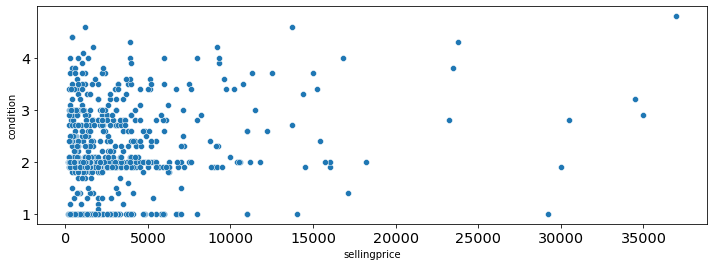

In [ ]:
sns.scatterplot(x='sellingprice', y='condition', data = odo_1)

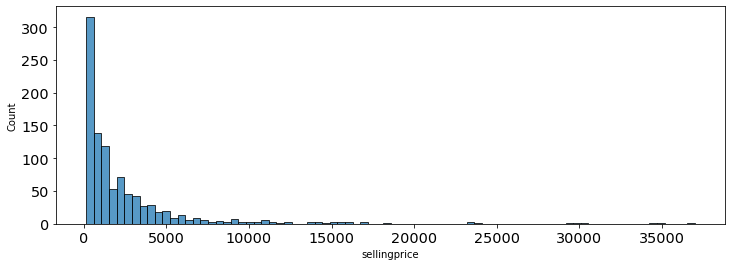

In [ ]:
sns.histplot(x = 'sellingprice', data=odo_1)

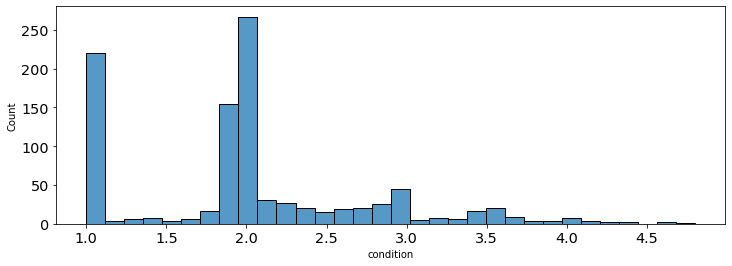

In [ ]:
sns.histplot(x = 'condition', data=odo_1)

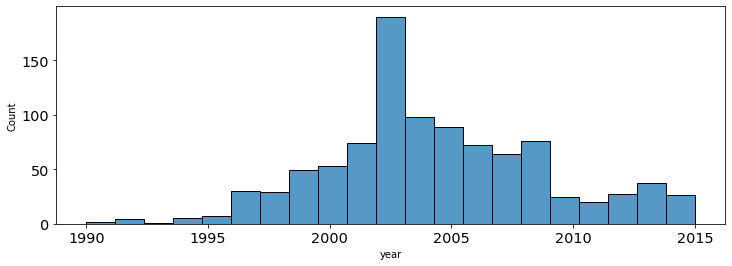

In [ ]:
sns.histplot(x='year', data = odo_1)

Data with an odometer value of 1 there are 2 possibilities:
1. It's the same with a new car which after being purchased and only a test drive is carried out so that the selling price will not drop much from the original price. In addition, generally with a low odometer, the condition column should show a rating of > 3.5 and the year the car was released could affect the selling price.


2. The odometer has passed the max value (999999) so that the odometer value returns to 1 so that it will be in accordance with the conditions, where the physical condition of the car or car engine is not good (condition = 1-3)

From the plots above, we can drop several rows that have a condition with an odometer of 1 and an odd selling price (used car prices cannot be below 1300)

In [ ]:
odo_1.groupby(['year']).agg({'sellingprice' : ['min', 'max']})

sellingprice       
              min    max
year                    
1990          225   2800
1992          300    450
1993          200    200
1994          350   2100
1995          225    650
1996          200   1700
1997          200   1500
1998          300   1700
1999          150   7200
2000          150   7100
2001          225   5500
2002          275   5000
2003          200   5200
2004          200   6100
2005          200  15750
2006          200  35000
2007          300  15000
2008          400  23500
2009          400  16000
2010          400  30500
2011          400  17100
2012          500  37000
2013          300  29200
2014         1000  34500
2015         2100  18200

In [ ]:
df=df[ ~(df['sellingprice'] < 1300) ]

In [ ]:
df.describe()

,year,condition,odometer,sellingprice
count,455693.000000,455693.000000,455693.000000,455693.000000
mean,2010.531783,3.478687,63295.440700,14163.123761
std,3.436049,0.913117,48000.788276,9457.206338
min,1990.000000,1.000000,1.000000,1300.000000
25%,2008.000000,2.800000,27472.000000,7900.000000
50%,2012.000000,3.600000,48879.000000,12500.000000
75%,2013.000000,4.200000,91661.000000,18500.000000
max,2015.000000,5.000000,999999.000000,230000.000000


In [ ]:
df.loc[df['sellingprice'] > 25000]

,year,make,body,transmission,condition,odometer,color,sellingprice,saledate,top_20_brand
2,2014,bmw,sedan,automatic,4.5,1331.0,gray,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),bmw
3,2015,volvo,sedan,automatic,4.1,14282.0,white,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),others
4,2014,bmw,sedan,automatic,4.3,2641.0,gray,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),bmw
6,2014,bmw,sedan,automatic,3.4,14943.0,black,65000,Wed Dec 17 2014 12:30:00 GMT-0800 (PST),bmw
8,2014,audi,sedan,automatic,4.2,9557.0,white,32250,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),audi
...,...,...,...,...,...,...,...,...,...,...
558790,2013,mercedes-benz,suv,automatic,5.0,26799.0,black,105000,Tue Jul 07 2015 06:00:00 GMT-0700 (PDT),merce
558798,2013,audi,convertible,automatic,5.0,20158.0,silver,42000,Thu Jul 09 2015 06:00:00 GMT-0700 (PDT),audi
558807,2012,ram,cab,automatic,5.0,54393.0,white,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),others
558808,2012,bmw,suv,automatic,4.8,50561.0,black,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),bmw


Kolom Color

In [ ]:
df.color.unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

## Outliers

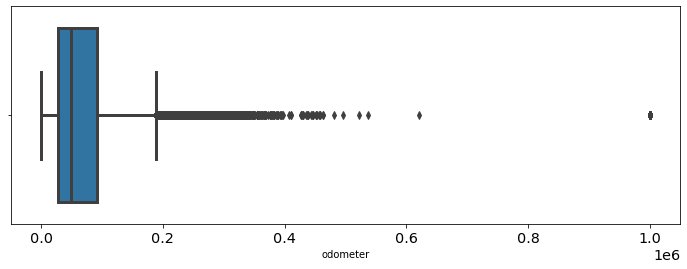

In [ ]:
sns.boxplot(x=df['odometer'])

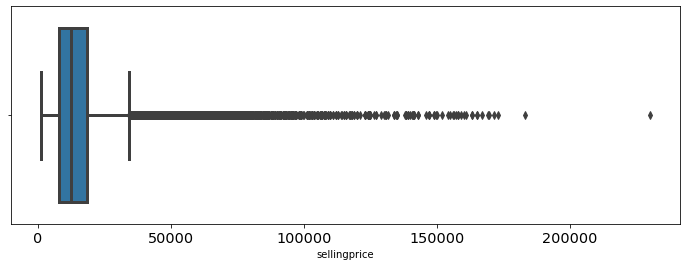

In [ ]:
sns.boxplot(x=df['sellingprice'])

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['odometer', 'sellingprice']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 455693
Jumlah baris setelah memfilter outlier: 432916


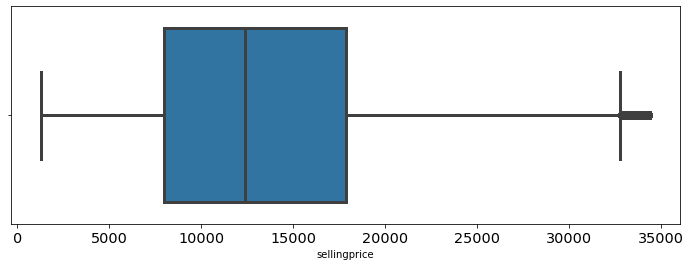

In [ ]:
sns.boxplot(x=df['sellingprice'])

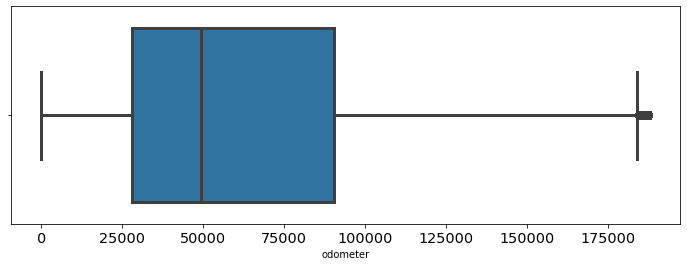

In [ ]:
sns.boxplot(x=df['odometer'])

## Normalization/Standardization

In [ ]:
df.describe()

,year,condition,odometer,sellingprice
count,432916.000000,432916.000000,432916.000000,432916.000000
mean,2010.558085,3.470324,61608.866270,13324.970223
std,3.358093,0.904535,42533.040403,7318.595503
min,1990.000000,1.000000,1.000000,1300.000000
25%,2008.000000,2.800000,28186.000000,8000.000000
50%,2012.000000,3.600000,49450.500000,12400.000000
75%,2013.000000,4.200000,90518.250000,17900.000000
max,2015.000000,5.000000,187942.000000,34400.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df['year_std'] = StandardScaler().fit_transform(df['year'].values.reshape(len(df), 1))
df['condition_std'] = StandardScaler().fit_transform(df['condition'].values.reshape(len(df), 1))
df['odometer_std'] = StandardScaler().fit_transform(df['odometer'].values.reshape(len(df), 1))
df['sellingprice_std'] = StandardScaler().fit_transform(df['sellingprice'].values.reshape(len(df), 1))

In [ ]:
df.describe()

,year,condition,odometer,sellingprice,year_std,condition_std,odometer_std,sellingprice_std
count,432916.000000,432916.000000,432916.000000,432916.000000,4.329160e+05,4.329160e+05,4.329160e+05,4.329160e+05
mean,2010.558085,3.470324,61608.866270,13324.970223,2.965511e-15,-1.034128e-15,3.506041e-16,-9.502203e-15
std,3.358093,0.904535,42533.040403,7318.595503,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,1990.000000,1.000000,1.000000,1300.000000,-6.121960e+00,-2.731046e+00,-1.448472e+00,-1.643073e+00
25%,2008.000000,2.800000,28186.000000,8000.000000,-7.617681e-01,-7.410716e-01,-7.858104e-01,-7.275954e-01
50%,2012.000000,3.600000,49450.500000,12400.000000,4.293855e-01,1.433617e-01,-2.858573e-01,-1.263864e-01
75%,2013.000000,4.200000,90518.250000,17900.000000,7.271740e-01,8.066866e-01,6.796932e-01,6.251247e-01
max,2015.000000,5.000000,187942.000000,34400.000000,1.322751e+00,1.691120e+00,2.970239e+00,2.879658e+00


## Feature Encoding

In [ ]:
df['transmission_label'] = df['transmission'].astype('category').cat.codes
df['make_label'] = df['top_20_brand'].astype('category').cat.codes
df['body_label'] = df['body'].astype('category').cat.codes
df['color_label'] = df['color'].astype('category').cat.codes

In [ ]:
df.head()

,year,make,body,transmission,condition,odometer,color,sellingprice,saledate,top_20_brand,year_std,condition_std,odometer_std,sellingprice_std,transmission_label,make_label,body_label,color_label
0,2015,kia,suv,automatic,5.0,16639.0,white,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),kia,1.322751,1.691120,-1.057294,1.117023,0,11,6,17
1,2015,kia,suv,automatic,5.0,9393.0,white,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),kia,1.322751,1.691120,-1.227656,1.117023,0,11,6,17
2,2014,bmw,sedan,automatic,4.5,1331.0,gray,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),bmw,1.024962,1.138349,-1.417203,2.278449,0,1,5,7
3,2015,volvo,sedan,automatic,4.1,14282.0,white,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),others,1.322751,0.696132,-1.112710,1.971013,0,17,5,17
5,2015,nissan,sedan,automatic,1.0,5554.0,gray,10900,Tue Dec 30 2014 12:00:00 GMT-0800 (PST),nissan,1.322751,-2.731046,-1.317915,-0.331344,0,16,5,7


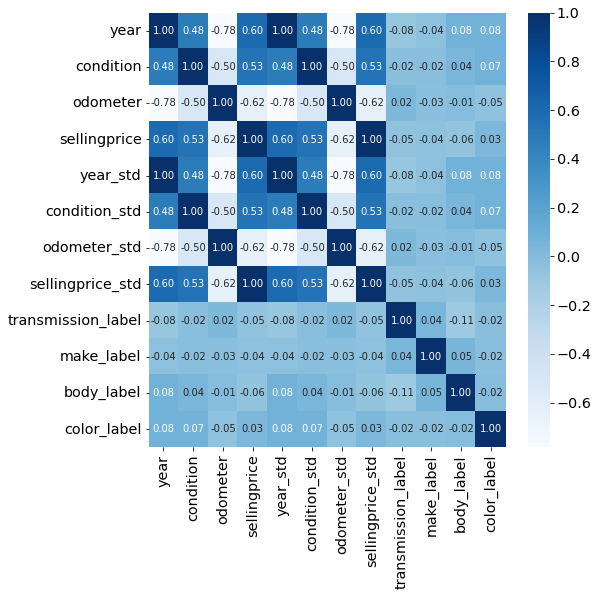

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

##Imbalanced Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


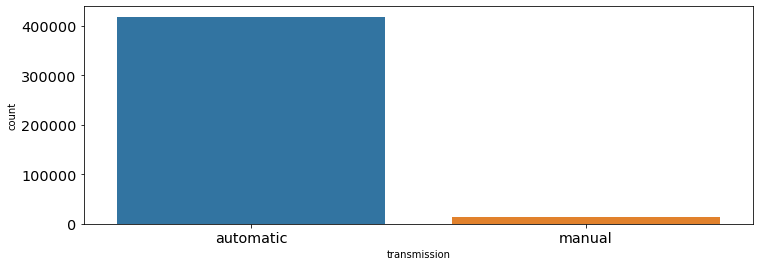

In [ ]:
sns.countplot(df['transmission'])

The majority of the transmission column contain automatic values. There are only a few cars that have a manual transmission, which has no significant effect on the dataset. In this case, we decided not to include the transmission column in the next step.

# Stage 3 Final Project - Machine Learning Modeling & Evaluation 

## Split Train & Test

In [ ]:
x = df.drop(columns=['sellingprice','year','make','body','transmission','transmission_label','condition','odometer','color','saledate','top_20_brand']) # menggunakan semua feature kecuali target
y = df['sellingprice']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42) #Splitting the data into Train and Test

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print("MSE: %.2f" % mean_squared_error(ytest, pred, squared=True)) # The MSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

##Linear Regression

In [ ]:
x = df.drop(columns=['sellingprice_std','sellingprice','year','make','body','transmission','transmission_label','condition','odometer','color','saledate','top_20_brand','pricesegmentation']) # menggunakan semua feature kecuali target
y = df['sellingprice_std']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42) #Splitting the data into Train and Test

In [ ]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = regressor.predict(X_test)
print('Coefficients: \n', regressor.coef_) # The slope
print('Intercept: \n', regressor.intercept_) # The Intercept
eval_regression(regressor, pred, X_train, y_train, X_test,y_test)

Coefficients: 
 [ 0.24244953  0.27021511 -0.30101424 -0.0047346  -0.05324259 -0.00395624]
Intercept: 
 0.3374326890130373
MAE: 0.56
RMSE: 0.72
MSE: 0.51
R2 score: 0.49


In [ ]:
print("train Accuracy : ",regressor.score(X_train,y_train))
print("test Accuracy : ",regressor.score(X_test,y_test))

train Accuracy :  0.48443029809456994
test Accuracy :  0.48638190438744067


In [ ]:
from sklearn.linear_model import Lasso, Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

pred = ridge_model.predict(X_test)
eval_regression(ridge_model, pred, X_train, y_train, X_test,y_test)

MAE: 4091.92
RMSE: 5248.97
MSE: 27551691.67
R2 score: 0.49


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.01, 0.1, 1, 2, 5, 10, 100, 200, 230, 250, 265, 270, 275, 290, 300, 500] # alpha
solver = ['lsqr', 'auto', 'sag', 'saga', 'cholesky']
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, solver=solver, fit_intercept=fit_intercept)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters,n_iter=15, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(X_train, y_train)

pred = best_model.predict(X_test)
eval_regression(best_model, pred, X_train, y_train, X_test, y_test)

MAE: 0.56
RMSE: 0.72
MSE: 0.51
R2 score: 0.49


In [ ]:
show_best_hyperparameter(best_model.best_estimator_,hyperparameters)

Best alpha: 300
Best solver: sag
Best fit_intercept: True


##Decision Tree

In [ ]:
x = df.drop(columns=['sellingprice_std','sellingprice','year_std','make','body','transmission','transmission_label','condition_std','odometer_std','color','saledate','top_20_brand','pricesegmentation']) # menggunakan semua feature kecuali target
y = df['sellingprice']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42) #Splitting the data into Train and Test

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
eval_regression(dt, pred, X_train, y_train, X_test,y_test)

MAE: 3133.35
RMSE: 4613.37
MSE: 21283143.74
R2 score: 0.60


In [ ]:
print("train Accuracy : ",dt.score(X_train,y_train))
print("test Accuracy : ",dt.score(X_test,y_test))

train Accuracy :  0.9999748726460166
test Accuracy :  0.6021092702552369


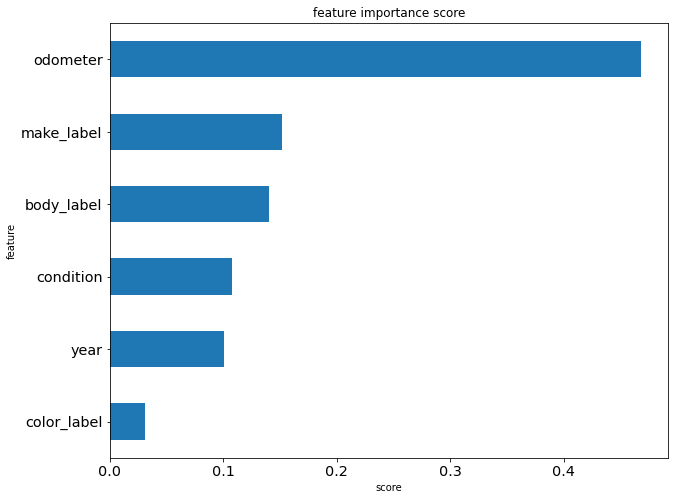

In [ ]:
show_feature_importance(dt)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeRegressor(random_state=42)
dt_tuned = RandomizedSearchCV(dt, hyperparameters,n_iter=15, cv=5, random_state=42, scoring='r2')
dt_tuned.fit(X_train, y_train)

# Predict & Evaluation
pred = dt_tuned.predict(X_test)#Check performa dari model
eval_regression(dt_tuned, pred, X_train, y_train, X_test, y_test)

MAE: 2483.07
RMSE: 3497.80
MSE: 12234575.06
R2 score: 0.77


In [ ]:
print('Best max_depth:', dt_tuned.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', dt_tuned.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', dt_tuned.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', dt_tuned.best_estimator_.get_params()['max_features'])

Best max_depth: 42
Best min_samples_split: 2
Best min_samples_leaf: 50
Best max_features: auto


In [ ]:
print('Train score: ' + str(dt_tuned.score(X_train, y_train)))
print('Test score:' + str(dt_tuned.score(X_test, y_test)))

Train score: 0.7931378078807143
Test score:0.7719232857672775


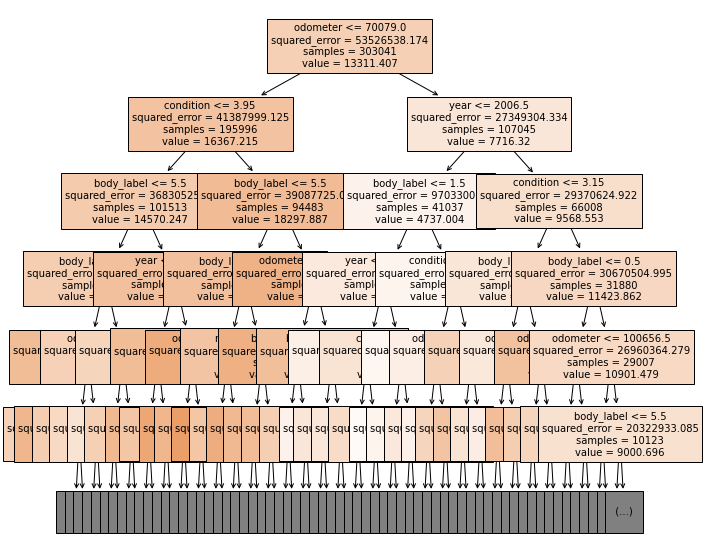

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dt_tuned.best_estimator_,
               feature_names = x.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

Text(0.5, 1.0, 'feature importance score')

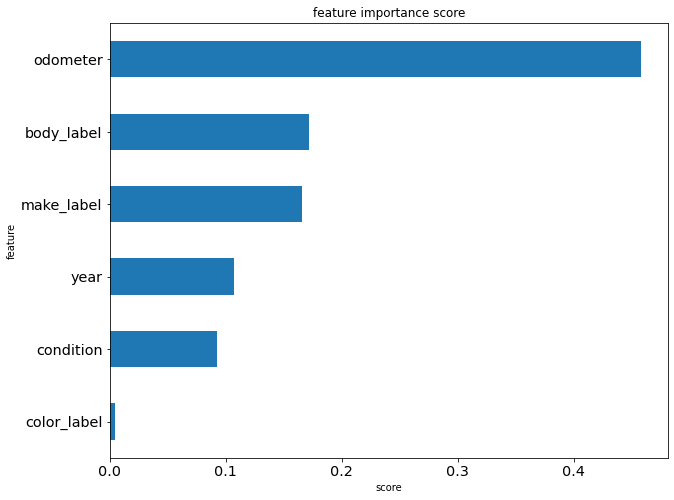

In [ ]:
# plt.figsize(10, 8)
feat_importances = pd.Series(dt_tuned.best_estimator_.feature_importances_, index=x.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

##Random Forest

In [ ]:
x = df.drop(columns=['sellingprice_std','sellingprice','year_std','make','body','transmission','transmission_label','condition_std','odometer_std','color','saledate','top_20_brand','pricesegmentation']) # menggunakan semua feature kecuali target
y = df['sellingprice']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42) #Splitting the data into Train and Test

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
eval_regression(rf, pred, X_train, y_train, X_test,y_test)

MAE: 2389.57
RMSE: 3433.03
MSE: 11785719.38
R2 score: 0.78


In [ ]:
print("train Accuracy : ",rf.score(X_train,y_train))
print("test Accuracy : ",rf.score(X_test,y_test))

train Accuracy :  0.9695902048366765
test Accuracy :  0.7799979070480249


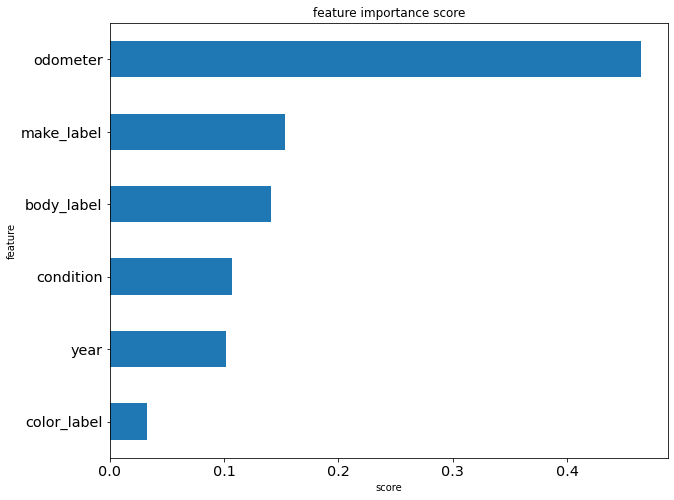

In [ ]:
show_feature_importance(rf)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
hyperparameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Init
rf = RandomForestRegressor(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='r2')
rf_tuned.fit(X_train,y_train)
# Predict & Evaluation
pred = rf_tuned.predict(X_test)
eval_regression(rf_tuned, pred, X_train, y_train, X_test, y_test)

MAE: 2399.52
RMSE: 3395.57
MSE: 11529905.49
R2 score: 0.79


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
rf_tuned = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring= 'r2')

# Init
#rf = RandomForestRegressor(random_state=42)
#rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='r2')
#rf_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_regression(rf_tuned, pred, X_train, y_train, X_test, y_test)

In [ ]:
print('Train score: ' + str(rf_tuned.score(X_train, y_train)))
print('Test score:' + str(rf_tuned.score(X_test, y_test)))

Train score: 0.9260550229743639
Test score:0.7850597223993491


In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 200
Best max_features: sqrt
Best max_depth: None
Best min_samples_split: 5
Best min_samples_leaf: 1
Best bootstrap: True


##XGBoost

In [ ]:
x = df.drop(columns=['sellingprice_std','sellingprice','year_std','make','body','transmission','transmission_label','condition_std','odometer_std','color','saledate','top_20_brand']) # menggunakan semua feature kecuali target
y = df['sellingprice']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42) #Splitting the data into Train and Test

In [ ]:
from xgboost import XGBClassifier, XGBRegressor
xg = XGBRegressor(random_state=42)
xg.fit(X_train, y_train)
pred = xg.predict(X_test)
eval_regression(xg, pred, X_train, y_train, X_test, y_test)

[14:24:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 2827.29
RMSE: 3818.80
MSE: 14583205.98
R2 score: 0.73


In [ ]:
print("train Accuracy : ",xg.score(X_train,y_train))
print("test Accuracy : ",xg.score(X_test,y_test))

train Accuracy :  0.7304836928507594
test Accuracy :  0.7281401529526665


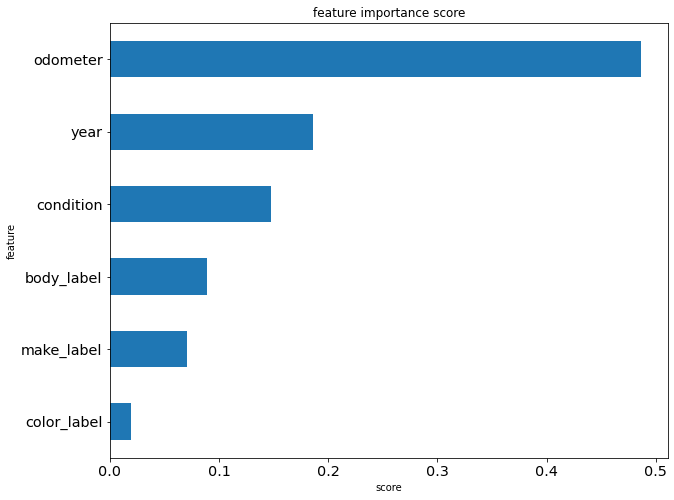

In [ ]:
show_feature_importance(xg)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth': [3,6,10],
                   'eta':[0.3,0.6,0.9,1,3,5]
                    }

# Init
xg = XGBRegressor(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters,n_iter=15, cv=5, random_state=42, scoring='r2')
xg_tuned.fit(X_train,y_train)
# Predict & Evaluation
pred = xg_tuned.predict(X_test)
eval_regression(xg_tuned, pred, X_train, y_train, X_test, y_test)

[12:43:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:43:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:43:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:43:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:44:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:44:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:44:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 10
Best eta: 0.9


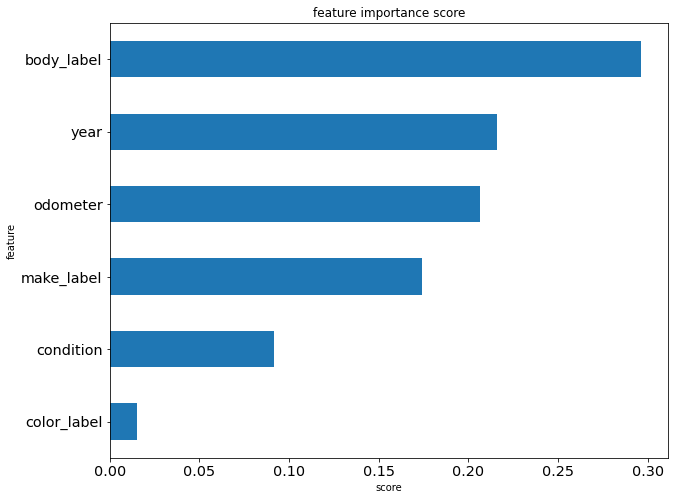

In [ ]:
show_feature_importance(xg_tuned.best_estimator_)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth': [10],
                   'eta':[0.9],
                   'min_child_weight' :[1, 10, 100],
                   'tree_method' : ['auto', 'exact', 'approx', 'hist']
                    }

# Init
xg = XGBRegressor(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, n_iter=15,cv=5, random_state=42, scoring='r2')
xg_tuned.fit(X_train,y_train)
# Predict & Evaluation
pred = xg_tuned.predict(X_test)
eval_regression(xg_tuned, pred, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=15. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[14:08:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 10
Best eta: 0.9
Best min_child_weight: 10
Best tree_method: approx


In [ ]:
print('Train score: ' + str(xg_tuned.score(X_train, y_train)))
print('Test score:' + str(xg_tuned.score(X_test, y_test)))

Train score: 0.8295591582945904
Test score:0.8078581034156959


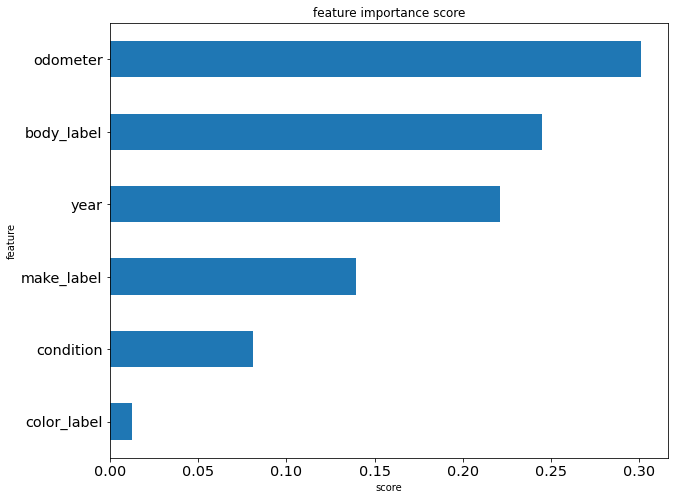

In [ ]:
show_feature_importance(xg_tuned.best_estimator_)

## Conclusion

In [ ]:
regressors = [Ridge(alpha=300,solver='sag',fit_intercept=True),
              DecisionTreeRegressor(max_depth=42,min_samples_split=2,min_samples_leaf=50,max_features='auto'),
              RandomForestRegressor(n_estimators=200,max_features='sqrt',max_depth=None,min_samples_split=5,min_samples_leaf=1,bootstrap=True),
              XGBRegressor(max_depth=10,eta=0.9,min_child_weight=10,tree_method='approx'),
              ]

dfcheck = pd.DataFrame(columns = ['Method', 'MAE', 'RMSE', 'R2 Score'])

In [ ]:
for regressor in regressors:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    method = str(type(regressor)).split('.')[-1][:-2]
    
    # MAE score
    mae = mean_absolute_error(y_test, y_pred)
    
    #RMSE Score
    rmse_value = mean_squared_error(y_test, y_pred,squared=False)
    
    #R2 Score
    r2 = r2_score(y_test, y_pred)
    
    dfcheck = dfcheck.append({'Method': method, 
                    'MAE': mae, 
                    'RMSE': rmse_value,
                    'R2 Score': r2},
                     ignore_index=True)

[13:00:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
dfcheck

,Method,MAE,RMSE,R2 Score
0,Ridge,4466.031403,5686.017843,0.397290
1,DecisionTreeRegressor,2483.070532,3497.795743,0.771923
2,RandomForestRegressor,2394.861082,3390.642736,0.785683
3,XGBRegressor,2250.569789,3210.443325,0.807858
